<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

**Антон, привет!** 👋

Меня зовут Алексей Манелюк, я буду проверять твой проект. В Яндекс Практикуме принято общаться на "ты", но если некомфортно - скажи и перейдем на "Вы".

Моя основная цель - не указать на ошибки, а поделиться опытом и помочь в освоении анализа данных.

В тетрадке ты увидишь мои комментарии, пожалуйста, не удаляй, не перемещай и не изменяй их. У комментариев могут быть приписки **2**, **3** и так далее, которые соответствуют каждой версии проверки. Напомню, что у тебя **6** попыток для успешной сдачи проекта.

Я буду использовать цветовую разметку:
<p>
<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

Так выделены критические замечания. Без их отработки я не смогу принять проект. </div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>  Комментарий ревьюера ⚠️</b>

Так выделены небольшие замечания или полезные советы. Постарайся учесть их.</div>
<p>
<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Так выделены правильные решения.</div>

Предлагаю работать в диалоге: если что-то дорабатываешь или отвечаешь на мой комментарий - пиши об этом. Мне будет удобней, если ты выделишь свои комментарии:
<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

Все это поможет мне быстрее принять твой проект.</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Правильно, что начал проект с описания. Можно также добавить краткий план работы.</div>

Предлагаю работать в диалоге: если что-то дорабатываешь или отвечаешь на мой комментарий - пиши об этом. Мне будет удобней, если ты выделишь свои комментарии:
<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

### Просмотр общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>📌 Хорошая практика - разделять ячейки загрузки библиотек и данных. Если понадобится подключить дополнительную библиотеку, не нужно будет заново загружать данные и перезаписывать переменные.</div>

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Отлично! 👍</div>

In [3]:
data.describe().round(1).style.format({'last_price': '{:.0f}'}) #используем format, иначе цена отобразится в экспоненциальной форме

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.900000,6541549,60.300000,2.100000,2.800000,10.700000,34.500000,5.900000,10.600000,1.200000,28793.700000,14191.300000,0.600000,490.800000,0.800000,518.000000,180.900000
std,5.700000,10887013,35.700000,1.100000,1.300000,6.600000,22.000000,4.900000,5.900000,1.100000,12630.900000,8608.400000,0.800000,342.300000,0.900000,277.700000,219.700000
min,0.000000,12190,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400000,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4650000,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6800000,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,763000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Сразу переведем в змеиный регистр названия колонок:

In [5]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                     'parks_around3000': 'parks_around_3000', 
                     'ponds_around3000': 'ponds_around_3000' }, inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Просмотрим количество пропусков в каждом столбце в процентах:

In [6]:
for column in data.columns:
    print(column, ("{:.1%}".format(data.isna()[column].sum()/len(data))))
#Пробовал избежать цикла с помощью "where" - не получилось:(

total_images 0.0%
last_price 0.0%
total_area 0.0%
first_day_exposition 0.0%
rooms 0.0%
ceiling_height 38.8%
floors_total 0.4%
living_area 8.0%
floor 0.0%
is_apartment 88.3%
studio 0.0%
open_plan 0.0%
kitchen_area 9.6%
balcony 48.6%
locality_name 0.2%
airports_nearest 23.4%
city_centers_nearest 23.3%
parks_around_3000 23.3%
parks_nearest 65.9%
ponds_around_3000 23.3%
ponds_nearest 61.6%
days_exposition 13.4%


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Вывести долю пропусков по столбцам можно так:

```py
data.isna().mean()
```

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

In [7]:
data.isna().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
city_centers_nearest   0.23
parks_around_3000      0.23
parks_nearest          0.66
ponds_around_3000      0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

Пропусков очень много в общем, и в некоторых столбцах в частности. Построим общую гистограмму, чтобы оценить нормальность распределения имеющихся данных, на которые мы будем опираться при заполнении пропусков в предобработке.

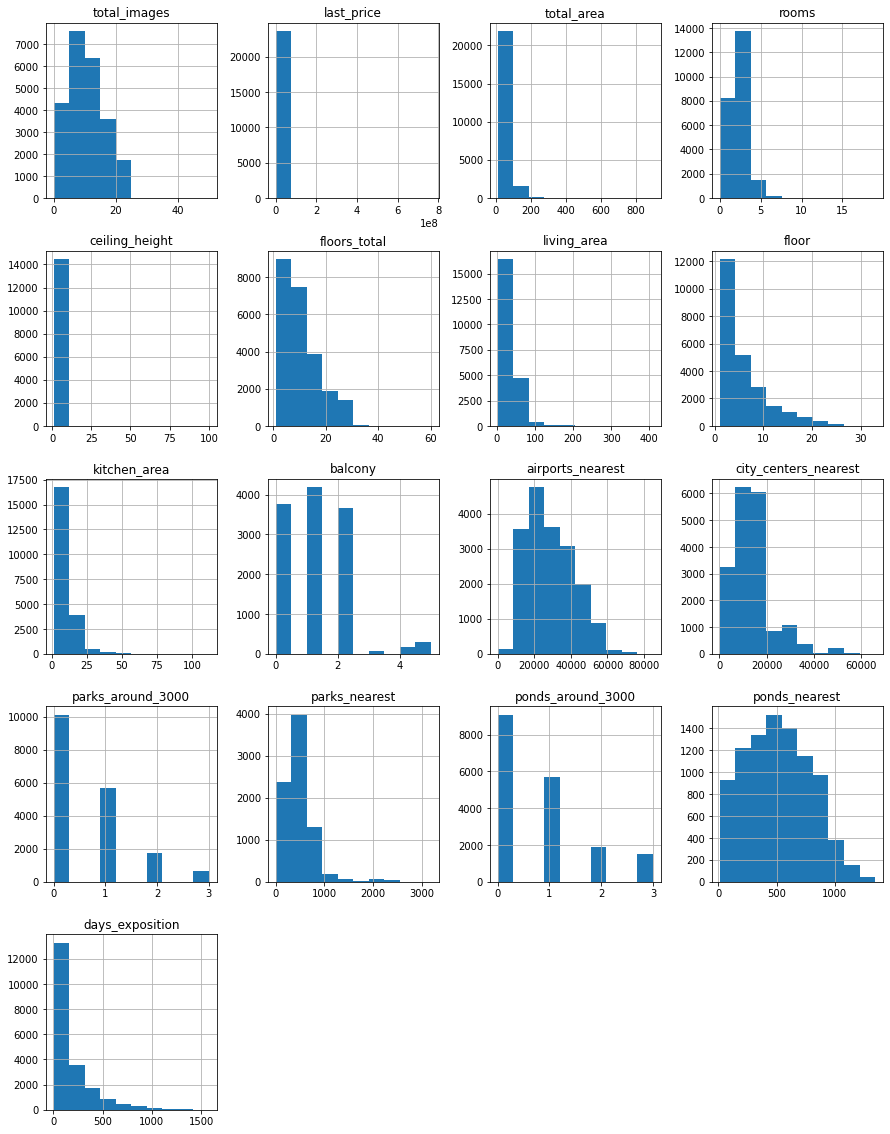

In [8]:
data.hist(figsize=(15, 20))
plt.show()

В первом приближении данные выглядят неплохо. Можно переходить к предобработке.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Можно чуть подробнее написать выводы по первичному знакомству с данными.

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Ниже дописал.</div>

#### Выводы по первичному знакомству с данными:

1. **Общая информация о данных:**
   - В файле содержится информация по 23 699 объектам недвижимости.
   - Каждый объект описывается 22 признаками: 17 количественными, 4 категориальными и 1 временным.
   - В первом приближении распределения выглядят нормально.
   - В данных обнаружено большое количество пропущенных значений, которые требуется обработать.
   - Большинство колонок нуждается в замене типа данных.
   - Переименован столбец cityCenters_nearest в стиле snake_case.
   - Замечены аномалии в данных, такие как максимальная высота потолка в 100 метров и количество комнат равное нулю, что будет разобрано ниже. 
  
  В целом, данные местами противоречивые, очень неполные, но в следующих разделах мы попытаемся их восстановить или хотя бы по-максимуму сохранить.


<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Отличный вывод по первому шагу! 👌

### Предобработка данных

#### Поиск явных дубликатов

Проверим наличие явных дубликатов.

In [9]:
data.duplicated().sum()

0

Явных дубликатов не оказалось. Что ж, движемся дальше)

#### Заполнение пропусков

##### Заполнение пропусков в столбце с данными о высоте потолков

Найдем количество пропусков в столбце

In [10]:
data['ceiling_height'].isna().sum()

9195

Пропусков очень много, почти 40%. Посмотрим для начала, что с имеющимися данными.

In [11]:
data['ceiling_height'].sort_values(ascending=False).head(30)

22869   100.00
22336    32.00
3148     32.00
21377    27.50
20478    27.00
5246     27.00
5807     27.00
10773    27.00
17857    27.00
22938    27.00
21824    27.00
4876     27.00
5669     26.00
18545    25.00
11285    25.00
355      25.00
6246     25.00
14382    25.00
4643     25.00
9379     25.00
5076     24.00
20507    22.60
17496    20.00
15061    14.00
22309    10.30
5863      8.30
15743     8.00
3474      8.00
17442     8.00
20264     6.00
Name: ceiling_height, dtype: float64

Даже 25м потолки - это нечто, не говоря о 100м. Напрашивается человеческий фактор. Заменим значения высот потолков, которые составляют 20 и более метров, на уменьшеные в 10 раз, что в данном случае более реалистично

In [12]:
for i in range(len(data)):
    if data.loc[i, 'ceiling_height'] >= 20:
        data.loc[i, 'ceiling_height'] /= 10
    
data['ceiling_height'].value_counts().sort_index(ascending=False)#.head(100)#.plot.barh(x='ceiling_height')


14.00     1
10.30     1
10.00     1
8.30      1
8.00      3
         ..
2.20      1
2.00     12
1.75      1
1.20      1
1.00      1
Name: ceiling_height, Length: 176, dtype: int64

Оказывается, есть потолки 2м и ниже. Т.к. встречаемость высоких потолков, судя по текущим данным - низкая, то напрашивается гипотеза об ошибке ввода(missclick): при заполнении двойку перепутали с единицей. Число "хоббитских" квартир невелико. Прибавим им 1м высоты:

In [13]:
for i in range(len(data)):       
    if data.loc[i, 'ceiling_height'] <=1.1:  #Квартире с 1м-потолком прибавим 2м                   
        data.loc[i, 'ceiling_height'] += 2
    if data.loc[i, 'ceiling_height'] <=2.1:  #Остальным добавляем по метру                        
        data.loc[i, 'ceiling_height'] += 1
data['ceiling_height'].value_counts().sort_index(ascending=False)


14.00    1
10.30    1
10.00    1
8.30     1
8.00     3
        ..
2.34     1
2.30     4
2.26     1
2.25     1
2.20     2
Name: ceiling_height, Length: 172, dtype: int64

Визуализируем распределение. Ниже будет классическая гистограмма, 
но в этом случае мне нравится видеть пики повторяющихся высот

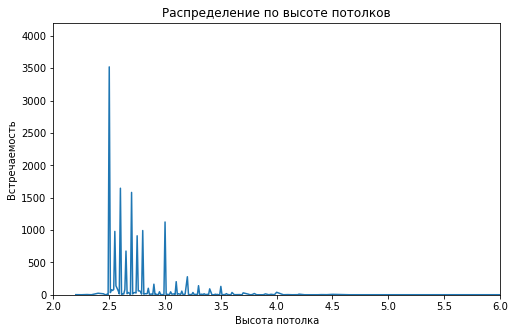

In [14]:
plt.xlabel('Высота потолка')
plt.ylabel('Встречаемость')
data['ceiling_height'].value_counts().sort_index(ascending=False).plot(xlim=(2,6), ylim=(0,4200),\
                       title='Распределение по высоте потолков', figsize=(8,5))
plt.show()

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Хорошо бы добавить заголовки всем графикам проекта.

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Добавил</div>

count   14,504.00
mean         2.73
std          0.32
min          2.20
25%          2.52
50%          2.65
75%          2.80
max         14.00
Name: ceiling_height, dtype: float64

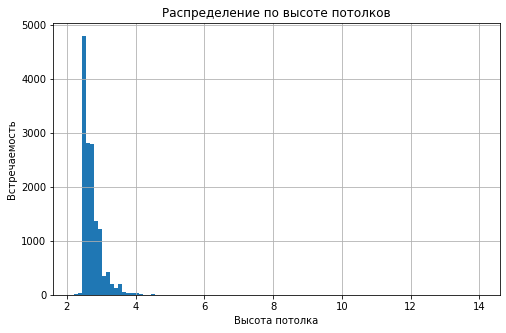

In [15]:
display(data['ceiling_height'].describe())
plt.xlabel('Высота потолка')
plt.ylabel('Встречаемость')
plt.title('Распределение по высоте потолков')
data['ceiling_height'].hist(bins=100, figsize=(8,5))
plt.show()

Форма граффика напоминает распределение Пуассона. Высота потолков - значимый показатель. В столбце почти 40% пропусков, следовательно, их замена будет сильно влиять на резульаты анализа. Отнесемся к этому серьезнее и посмотрим, с чем из хорошо представленных данных коррелирует высота потолков.


In [16]:
print('Корреляция с ценой:', round(data['ceiling_height'].corr(data['last_price']), 3))
print('Корреляция с жилплощадью:', round(data['ceiling_height'].corr(data['total_area']), 3))
print('Корреляция с количеством комнат:', round(data['ceiling_height'].corr(data['rooms']), 3))
print('Корреляция с удаленностью от центра:', round(data['ceiling_height'].corr(data['city_centers_nearest']), 3))
print('Корреляция с количеством этажей:', round(data['ceiling_height'].corr(data['floors_total']), 3))

Корреляция с ценой: 0.348
Корреляция с жилплощадью: 0.417
Корреляция с количеством комнат: 0.253
Корреляция с удаленностью от центра: -0.319
Корреляция с количеством этажей: -0.081


Посмотрим на матрицу диаграмм рассеяния

<function matplotlib.pyplot.show(close=None, block=None)>

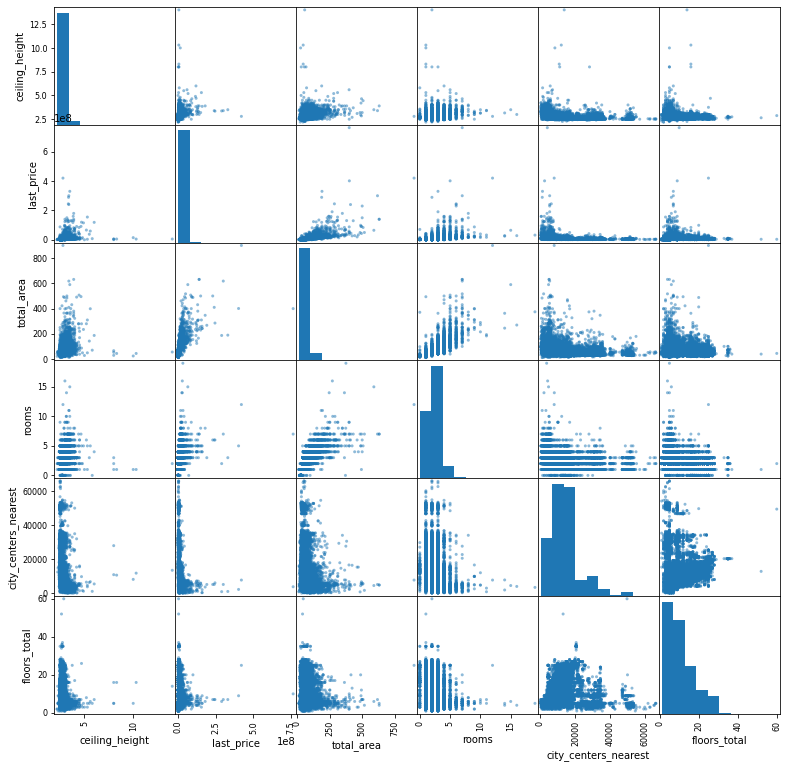

In [17]:
ceiling_corr = data[['ceiling_height', 'last_price', 'total_area', 'rooms', 'city_centers_nearest', 'floors_total']]
pd.plotting.scatter_matrix(ceiling_corr, figsize=(13, 13))
plt.show

Визуализируем конкретные корреляции с помощью диаграмм рассеяния:

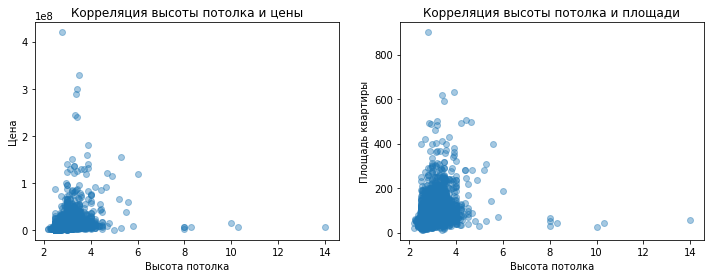

In [18]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(12,4))

axs[0].set(xlabel='Высота потолка', ylabel='Цена', title='Корреляция высоты потолка и цены')
axs[1].set(xlabel='Высота потолка', ylabel='Площадь квартиры', title='Корреляция высоты потолка и площади')
axs[0].scatter(data['ceiling_height'], data['last_price'], alpha=0.4)
axs[1].scatter(data['ceiling_height'], data['total_area'], alpha=0.4)
plt.show()

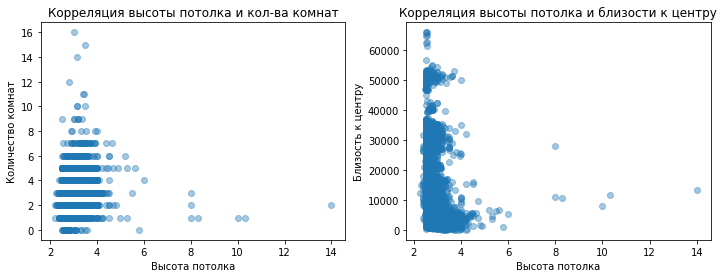

In [19]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(12,4) )

#axs[0].set_xlim([0, 14])
axs[0].set(xlabel='Высота потолка', ylabel='Количество комнат', title='Корреляция высоты потолка и кол-ва комнат')
axs[1].set(xlabel='Высота потолка', ylabel='Близость к центру', title='Корреляция высоты потолка и близости к центру')
axs[1].scatter(data['ceiling_height'], data['city_centers_nearest'], alpha=0.4)
axs[0].scatter(data['ceiling_height'], data['rooms'], alpha=0.4)
plt.show()

Квартиры с потолками от 8м выглядят аномально дешевыми и маленькими. Их всего 7. Удалим строки с ними и посмотрим, как это повлияет на статистику. 

In [20]:
data.drop(data[data['ceiling_height'] >= 8].index, inplace = True)
print('Корреляция с ценой:', round(data['ceiling_height'].corr(data['living_area']), 3))
print('Корреляция с площадью кв.:', round(data['ceiling_height'].corr(data['total_area']), 3))
print('Корреляция с количеством комнат:', round(data['ceiling_height'].corr(data['rooms']), 3))
print('Корреляция с удаленностью от центра:', round(data['ceiling_height'].corr(data['city_centers_nearest']), 3))

Корреляция с ценой: 0.462
Корреляция с площадью кв.: 0.483
Корреляция с количеством комнат: 0.296
Корреляция с удаленностью от центра: -0.366


In [21]:
data['meter_price']=data['last_price'] / data['total_area'] #Создадим столбец с ценой за м2, чтобы посмотреть корреляцию с ним
print('Корреляция с ценой за м2:', round(data['ceiling_height'].corr(data['meter_price']), 3))
print('Корреляция между ценой и общей площадью:', round(data['last_price'].corr(data['total_area']), 3))


#data.plot(x='city_centers_nearest', y='meter_price', kind='scatter')

Корреляция с ценой за м2: 0.365
Корреляция между ценой и общей площадью: 0.654


Выходит, что, исходя из текущего состояния данных, лучщий предиктор высоты потолка - общая площадь. Жилую площадь и площадь кухни использовать не будем, т.к. эти показатели - производные от общей площади, там около 10% пропущенных значений и это врядли улучшило бы результат. 
Сгруппируем цены по квартилям и найдем в каждой медианное значение высоты потолков, которое потом подставим в пропущенные ячейки

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Интересное решение. Но скорее высота потолка зависит от типа дома.

In [22]:
data['quantile_price'] = pd.qcut(data['last_price'], q=4)
display(data['quantile_price'].value_counts().sort_index()) #Диапазоны квартилей
data['quantile_price'] = pd.qcut(data['last_price'], q=4, labels=['cheap','middle','high','lux'])
display(data['quantile_price'].value_counts().sort_index()) #Переименуем ценовые группы в понятные названия
len(data['quantile_price']) #Деление не поровну из-за значений NaN.

(12189.999, 3400000.0]      5926
(3400000.0, 4650000.0]      6035
(4650000.0, 6800000.0]      5916
(6800000.0, 763000000.0]    5815
Name: quantile_price, dtype: int64

cheap     5926
middle    6035
high      5916
lux       5815
Name: quantile_price, dtype: int64

23692

In [23]:
print('Медиана потолков дешевых квартир:', data[data['quantile_price'] == 'cheap']['ceiling_height'].median())
print('Медиана потолков средних квартир:', data[data['quantile_price'] == 'middle']['ceiling_height'].median())
print('Медиана потолков дорогих квартир:', data[data['quantile_price'] == 'high']['ceiling_height'].median())
print('Медиана потолков квартир класса люкс:', data[data['quantile_price'] == 'lux']['ceiling_height'].median())


data.loc[data['quantile_price'] == 'cheap','ceiling_height'] = data.loc[data['quantile_price'] == 'cheap','ceiling_height']\
    .fillna(data[data['quantile_price'] == 'cheap']['ceiling_height'].median())

data.loc[data['quantile_price'] == 'middle','ceiling_height'] = data.loc[data['quantile_price'] == 'middle','ceiling_height']\
    .fillna(data[data['quantile_price'] == 'middle']['ceiling_height'].median())

data.loc[data['quantile_price'] == 'high','ceiling_height'] = data.loc[data['quantile_price'] == 'high','ceiling_height']\
    .fillna(data[data['quantile_price'] == 'high']['ceiling_height'].median())

data.loc[data['quantile_price'] == 'lux','ceiling_height'] = data.loc[data['quantile_price'] == 'lux','ceiling_height']\
.fillna(data[data['quantile_price'] == 'lux']['ceiling_height'].median())

data.head(10)

Медиана потолков дешевых квартир: 2.55
Медиана потолков средних квартир: 2.6
Медиана потолков дорогих квартир: 2.65
Медиана потолков квартир класса люкс: 2.9


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,quantile_price
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",lux
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.55,11.00,18.60,1,NaN,...,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",cheap
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,NaN,...,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",high
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.90,14.00,NaN,9,NaN,...,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",lux
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",lux
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,2.55,12.00,14.40,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,"95,065.79",cheap
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,2.60,26.00,10.60,6,NaN,...,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,"99,195.71",middle
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,2.90,24.00,NaN,22,NaN,...,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,"110,544.69",lux
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,2.55,27.00,15.43,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,"87,454.76",cheap
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,"88,524.59",high


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Отмечу, что результаты получились правдоподобные.

In [24]:
data['ceiling_height'].isna().sum() #Проверили, что пустых значений больше нет

0

##### Заполнение пропусков в столбце с данными о количестве этажей

Найдём количество пропусков

In [25]:
data['floors_total'].isna().sum()

86

Пропусков здесь немного, около половины процента. Тем проще и точнее будет их заполнить.

In [26]:
data['floors_total'].value_counts().sort_index() #распределение этажности на первый взгляд выглядит реалистично

1.00       25
2.00      383
3.00      668
4.00     1200
5.00     5785
6.00      914
7.00      592
8.00      390
9.00     3761
10.00    1174
11.00     203
12.00    1362
13.00     229
14.00     552
15.00     365
16.00    1373
17.00     833
18.00     505
19.00     339
20.00     271
21.00     158
22.00     286
23.00     352
24.00     469
25.00    1075
26.00     124
27.00     164
28.00      21
29.00       1
33.00       1
34.00       1
35.00      24
36.00       3
37.00       1
52.00       1
60.00       1
Name: floors_total, dtype: int64

In [27]:
data['floors_total'].describe()

count   23,606.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

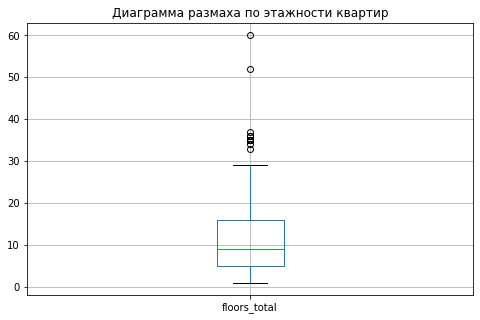

In [28]:
#Распределение выглядит близким к нормальному. Медиана немного меньше среднего.
data['floors_total'].plot(kind='box', figsize=(8, 5), grid=True)
plt.title('Диаграмма размаха по этажности квартир')
plt.show()

Для начала просмотрим самые очевидно напрашивающиеся корреляции:

In [29]:
print('Корреляция с удаленностью от центра:', round(data['floors_total'].corr(data['city_centers_nearest']), 3))
print('Корреляция с ценой:', round(data['floors_total'].corr(data['living_area']), 3))
print('Корреляция с площадью кв.:', round(data['floors_total'].corr(data['total_area']), 3))
print('Корреляция с количеством комнат:', round(data['floors_total'].corr(data['rooms']), 3))


Корреляция с удаленностью от центра: 0.02
Корреляция с ценой: -0.169
Корреляция с площадью кв.: -0.076
Корреляция с количеством комнат: -0.228


Сильных корреляций не наблюдается. Просмотрим, какой этаж указан в случае отсутствия сведений об этажности. Ниже для сравнения поместим общую гистограмму этажности. Оси имеют разный масштаб, чтобы иметь возможность видеть детали распределения

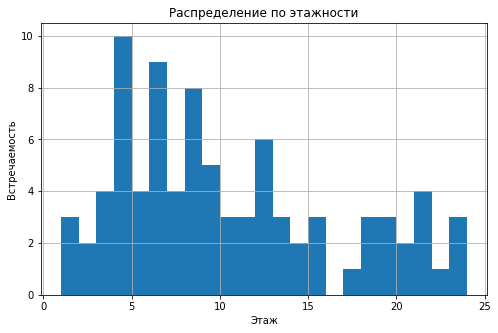

In [30]:
data[data['floors_total'].isna()]['floor'].hist(bins = 23, figsize=(8, 5) ) #гистограмма этажей в случае отсутствия этажности
plt.xlabel('Этаж')
plt.ylabel('Встречаемость')
plt.title('Распределение по этажности')
plt.show()

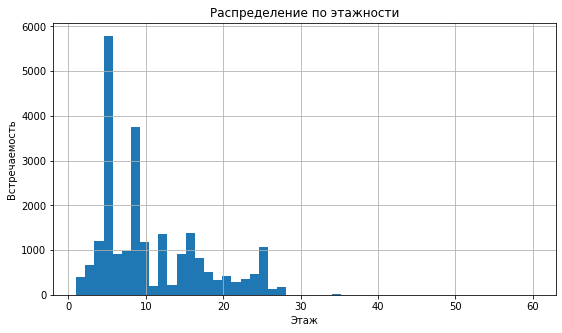

In [31]:
data['floors_total'].hist(bins=50, figsize=(9, 5)) #общая гистограмма этажности
plt.xlabel('Этаж')
plt.ylabel('Встречаемость')
plt.title('Распределение по этажности')
plt.show()

Для сохранения нормального распределения этажности поступим так: там, где указан невысокий этаж, увеличим его значение в случайное число раз, т.к. если это, допустим, 3-й этаж, то он может быть как в пяти, так и в 25-этажном доме; если же указан высокий этаж, то, вероятнее всего, он - один из последних, прибавим к нему небольшое случайное число. Разделим пропущенные этажности на квартили по этажам:

In [32]:
pd.qcut(data[data['floors_total'].isna()]['floor'], q=4).value_counts().sort_index()
#pd.qcut(data[data['floors_total'].isna()]['floor'], q=4)
#print(data['quantile_floor'])

(0.999, 5.0]     23
(5.0, 8.0]       21
(8.0, 13.75]     20
(13.75, 24.0]    22
Name: floor, dtype: int64

In [33]:
data['floors_total'].isna().sum()

86

In [34]:
#data.loc[(data['floors_total'].isna())&(5<data['floor']<=8),'floors_total'] = \
#data.loc[(data['floors_total'].isna())&(5<data['floor']<=8),'floors_total'].\
#fillna(data['floor']*np.random.randint(1,2)) #так почему-то не работает

data.loc[(data['floors_total'].isna())&(data['floor']<=5),'floors_total'] = \
data.loc[(data['floors_total'].isna())&(data['floor']<=5),'floors_total']\
.fillna(data['floor']*np.random.randint(1,4)) #Умножаем этажи на случайное число от 1 до 4

data.loc[(data['floors_total'].isna())&(data['floor']>5)&(data['floor']<=8),'floors_total'] = \
data.loc[(data['floors_total'].isna())&(data['floor']>5)&(data['floor']<=8),'floors_total']\
.fillna(data['floor']*np.random.randint(1,2)) #Умножаем этажи на случайное число от 1 до 2

data.loc[(data['floors_total'].isna())&(data['floor']>8)&(data['floor']<14),'floors_total'] = \
data.loc[(data['floors_total'].isna())&(data['floor']>8)&(data['floor']<14),'floors_total'].\
fillna(data['floor']+np.random.randint(0,8)) #Прибавляем случайное число этажей от 1 до 8

data.loc[(data['floors_total'].isna())&(data['floor']>=14),'floors_total'] = \
data.loc[(data['floors_total'].isna())&(data['floor']>=14),'floors_total'].\
fillna(data['floor']+np.random.randint(0,4)) #Прибавляем случайное число этажей от 1 до 4


In [35]:
data['floors_total'].isna().sum() #Проверили отсутствие пропусков

0

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Работа проделана большая, но заменено меньше 1% данных, причем на рандомные значения, стоило ли это делать. Я бы предпочел удалить или заменить на этаж квартиры указанный в объявлении.

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Мне нужно было понять, что могу. Сорри) И показалось, что в этом есть своя логика.</div>

Заменим тип данных на целочисленный.

In [36]:
data['floors_total'] = data['floors_total'].astype('int')

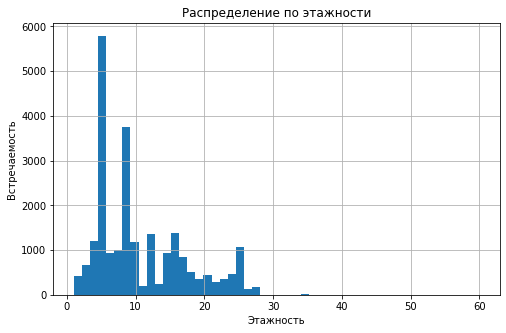

In [37]:
plt.xlabel('Этажность')
plt.ylabel('Встречаемость')
plt.title('Распределение по этажности')
data['floors_total'].hist(bins=50, figsize=(8, 5)) #Хуже точно не стало:)
plt.show()

##### Заполнение пропусков в столбце с данными о жилой площади

In [38]:
data['living_area'].isna().sum() #Находим количество пропусков

1903

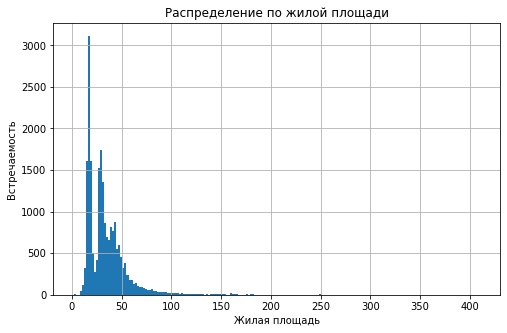

In [39]:
plt.xlabel('Жилая площадь')
plt.ylabel('Встречаемость')
plt.title('Распределение по жилой площади')
data['living_area'].hist(bins=200, figsize=(8, 5))
plt.show()

In [40]:
data['living_area'].sort_values(ascending=True).head(10)

21758   2.00
13915   2.00
23574   3.00
3242    3.00
17582   5.00
21943   5.40
16431   6.00
19251   6.50
20994   8.00
23208   8.00
Name: living_area, dtype: float64

В этой графе около 8% пропусков. Можно предположить, что это связано с тем, что кто-то не знает разницы между полной площадью и жилой, в которую не входят площадь кухни, коридора, ванной/санузла и т.п. Некоторые жилплощади подозрительно малы, но их немного и, возможно, это новый вид апартаментов.
Также в случае студии вычислить конкретно жилую площадь не всегда просто. 
На гистограмме видна своего рода интерференционная картина - пики дискретны, особенно первые. Скорее всего, это связано с количеством комнат - все однушки, двушки и т.д. примерно одной площади между собой. Посмотрим корреляцию и количество пропусков в случае студии.

In [41]:
data['living_area'].corr(data['rooms'])

0.8459613055150073

Корреляция сильная, что логично.

In [42]:
print('Количество студий:', data['studio'].sum())
print('Количество пропусков жилплощади в них:', data[data['studio'] == 1]['living_area'].isna().sum())

Количество студий: 149
Количество пропусков жилплощади в них: 10


Студии заполнены почти полностью. Просмотрим комнаты, чтобы определить категории для замены

In [43]:
data['rooms'].value_counts()

1     8043
2     7938
3     5813
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Есть квартиры с 0 комнат, что наводит на мысли о том, что это однокомнатная студия. Также есть единичные квартиры очень  большим количеством комнат. Возможно, это ошибки ввода данных. Просмотрим их площадь и "студийность" квартир с 0 комнат.

In [44]:
display(data.query("rooms > 9")['total_area'])
print('Количество студий с 0 комнат:', len(data.query('rooms == 0 and studio == 1')))

648     183.70
866     363.00
4149    272.60
5358    590.00
9688    194.10
14498   374.60
18119   216.10
18848   270.00
18891   290.00
19540   900.00
20829   245.40
Name: total_area, dtype: float64

Количество студий с 0 комнат: 138


In [45]:
data[data['studio'] == 1]['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

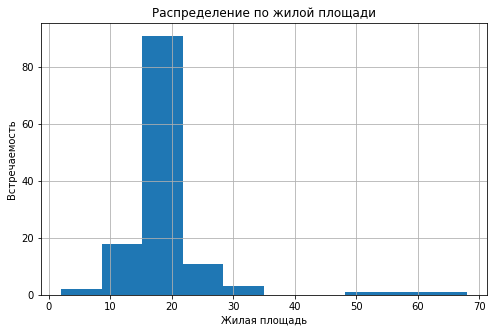

In [46]:
plt.xlabel('Жилая площадь')
plt.ylabel('Встречаемость')
plt.title('Распределение по жилой площади')
data[(data['studio'] == 1)&(data['rooms'] == 0)]['living_area'].hist(figsize=(8, 5))
plt.show()

Выходит, почти все студии указаны как 0-комнатные квартиры, что видно также и по их площади. Сразу перепишем их в однокомнатные. Даже если это и в какой-то степени не так, радикально на статистике это не скажется, но, вероятно,немного исправит.

In [47]:
data.loc[(data['studio'] == 1)&(data['rooms'] == 0),'rooms'] = 1
data['rooms'].value_counts()

1     8181
2     7938
3     5813
4     1180
5      326
6      105
7       59
0       59
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

In [48]:
data[data['living_area'].isna()]['rooms'].value_counts() #Количества n-комнатных квартир с пропущенными значениями жилплощади

1    669
2    644
3    448
4     91
5     34
6      6
7      6
0      4
9      1
Name: rooms, dtype: int64

Заменим пропуски соответствующими медианами:

In [49]:
#for i in range(0,10):
#    data.loc[(data['living_area'].isna())&(data['rooms'] == i),'living_area'] = \
#    data.loc[(data['living_area'].isna())&(data['rooms'] == i),'living_area'].\
#    fillna(data[data['rooms'] == i]['living_area'].median())
#data['living_area'].isna().sum() #Проверка

Высчитаем средний коэффициент отношения жилой площади к нежилой

In [50]:
ratio_living = (data['living_area'] / data['total_area']).median()  

Заменим пропуски через найденный коэффициент

In [51]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * ratio_living)
data['living_area'].isna().sum()

0

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Такое решение не выглядит оптимальным - заполняя пропуски медианой мы рискуем получить жилую площадь, превышающую общую. Такие пропуски имеет смысл заполнять через средний коэффициент отношения жилой площади к общей. 
    
Аналогично и по площади кухни.

In [52]:
# Код ревьюера
data.query('living_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,quantile_price


<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Исправил через коэффициент отношения</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Теперь замена пропусков площадей кухни и жилой выполнена правильно.

#### Заполнение пропусков в столбце с данными о площади кухни

In [53]:
data['kitchen_area'].isna().sum()

2276

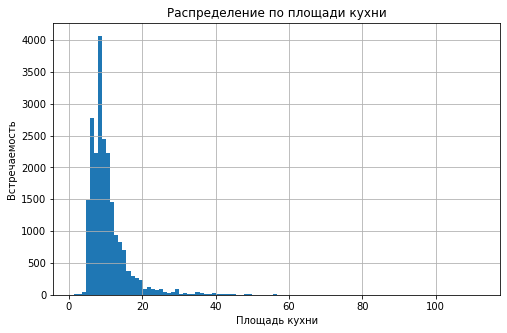

In [54]:
plt.xlabel('Площадь кухни')
plt.ylabel('Встречаемость')
plt.title('Распределение по площади кухни')
data['kitchen_area'].hist(bins=100, figsize=(8, 5))
plt.show()

In [55]:
data['kitchen_area'].describe()

count   21,416.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

In [56]:
data['kitchen_area'].sort_values(ascending=True).head(10)

20217   1.30
16367   2.00
9138    2.00
906     2.00
19642   2.00
6262    2.00
21419   2.00
11033   2.00
17834   2.30
8729    2.40
Name: kitchen_area, dtype: float64

Есть единичные как радикально маленькие кухни, так и огромные, но в целом наблюдается распределение Пуассона. Посчитаем потенциальные корреляции для последующей замены пропусков.

In [57]:
print('Корреляция с ценой:', round(data['kitchen_area'].corr(data['living_area']), 3))
print('Корреляция с площадью кв.:', round(data['kitchen_area'].corr(data['total_area']), 3))
print('Корреляция с количеством комнат:', round(data['kitchen_area'].corr(data['rooms']), 3))
print('Корреляция с удаленностью от центра:', round(data['kitchen_area'].corr(data['city_centers_nearest']), 3))

Корреляция с ценой: 0.436
Корреляция с площадью кв.: 0.609
Корреляция с количеством комнат: 0.27
Корреляция с удаленностью от центра: -0.19


<function matplotlib.pyplot.show(close=None, block=None)>

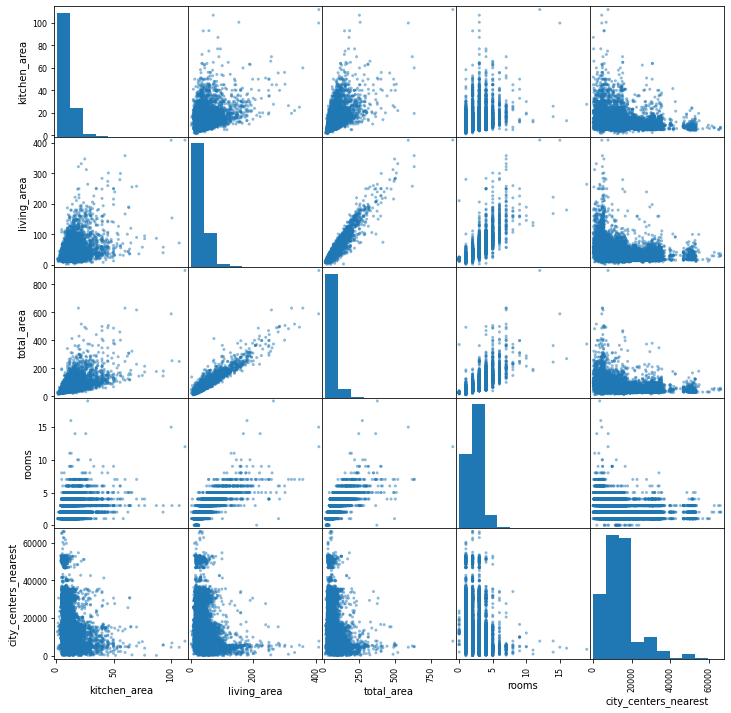

In [58]:
kitchen_corr = data[['kitchen_area', 'living_area', 'total_area', 'rooms', 'city_centers_nearest']]
pd.plotting.scatter_matrix(kitchen_corr, figsize=(12, 12))
plt.show

 "Оказывается", в центре кухни меньше. Возьмем площадь за референсное значение и сформируем категории для замены на соответствующие медианы. Для расчёта медиан будем брать только адекватные значения площади кухни, исключив выбросы логической индексацией, чтобы не копить ошибку.

In [59]:
#data['septile_area'] = pd.qcut(data['total_area'], q=7, labels=range(1,8)) #Cразу переименуем в индексы
#display(data['septile_area'].value_counts().sort_index()) #Количество строк в каждом септиле

#display(data.head(5))

#for i in range(1,8):
#    data.loc[(data['kitchen_area'].isna())&(data['septile_area'] == i),'kitchen_area'] = \
#    data.loc[(data['kitchen_area'].isna())&(data['septile_area'] == i),'kitchen_area'].\
#    fillna(data[(data['septile_area'] == i)&(4.5<data['kitchen_area'])&\
#                (data['kitchen_area']<45)]['kitchen_area'].median())
#data['kitchen_area'].isna().sum() #Проверка

 Найдём коэффициент отношения площади кухни к общей площади квартиры и заменим с помощью него пропуски

In [60]:
ratio_kitchen = (data['kitchen_area'] / data['total_area']).median()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * ratio_kitchen) 

data['kitchen_area'].isna().sum()

0

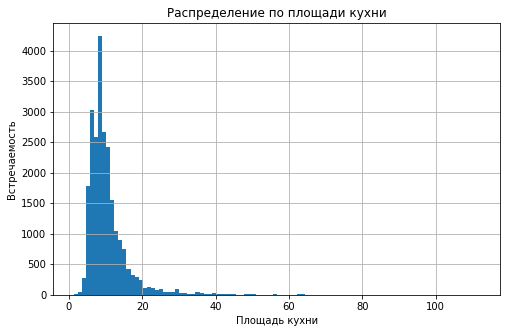

In [61]:
plt.xlabel('Площадь кухни')
plt.ylabel('Встречаемость')
plt.title('Распределение по площади кухни')
data['kitchen_area'].hist(bins=100, figsize=(8, 5))
plt.show()

#### Заполнение пропусков в столбце с принадлежностью к аппартаментам

In [62]:
display(data['is_apartment'].isna().sum())
data['is_apartment'].value_counts()

20919

False    2724
True       49
Name: is_apartment, dtype: int64

#### Заполнение пропусков в столбце с данными о наличии балконов

In [63]:
display(data['balcony'].isna().sum()) #Находим количество пропусков
data['balcony'].value_counts()

11516

1.00    4193
0.00    3758
2.00    3658
5.00     303
4.00     183
3.00      81
Name: balcony, dtype: int64

Очень много пропущенных значений, практически половина. Сложно поверить, что в половине квартир нет балконов. Еще очень странным кажется, что квартир с 5-ю балконами почти в два раза больше, чем с 4-мя, а с 4-мя - в два раза больше, чем с 3-мя. Балконов обыкновенно нет на первых этажах, но не только. Оставляем столбец без изменений, присвоив целочисленный тип данных.

In [64]:
data['balcony'] = data['balcony'].astype('Int64')

In [65]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,quantile_price
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,...,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",lux
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.55,11,18.60,1,NaN,...,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",cheap
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,...,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",high
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.90,14,90.30,9,NaN,...,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",lux
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",lux


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>
    
Согласен, можно оставить пропуски. Вообще, если есть пропуски в столбцах, которые предполагают значение Да/Нет, логично заменить на Нет/False.

#### Заполнение пропусков в столбце с населенным пунктом

In [66]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [67]:
display(data['locality_name'].isna().sum())

49

Здесь почти нет пропусков, но данные важны. Попробуем их восполнить. Проверим расстояние от центра в пропущенных ячейках.

In [68]:
data[data['locality_name'].isna()]['city_centers_nearest'].sort_values()

16610    1,322.00
22474    1,780.00
4189     3,039.00
19045    3,312.00
9821     3,801.00
4151     3,902.00
8568     4,065.00
11248    4,069.00
1097     4,258.00
20057    4,258.00
12936    4,383.00
10122    4,474.00
20654    4,604.00
7330     4,627.00
21333    4,805.00
4670     5,382.00
3574     8,127.00
18917    8,429.00
7114     8,582.00
16561    8,619.00
18526    8,943.00
23214    8,943.00
15866    9,497.00
5343     9,538.00
15686    9,633.00
17764   10,976.00
12879   12,332.00
7600    12,332.00
5707    16,788.00
14273   17,369.00
2603    17,369.00
2632    17,369.00
6765    17,369.00
22933   17,369.00
16499   17,369.00
19972   17,369.00
13223   17,369.00
13690   23,659.00
8986    31,813.00
21119   31,897.00
21276   41,294.00
2033          NaN
14342         NaN
17535         NaN
20382         NaN
20590         NaN
21715         NaN
21898         NaN
22717         NaN
Name: city_centers_nearest, dtype: float64

City в представленных населенных пунктах является только Питер, протяженность которого в различных направлениях такая: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км. Возьмём по минимуму. Тогда радиус Санкт-Петербурга ~16 км. Квартиры с неуказанной локацией и растоянием до центра меньше радиуса города будем считать питерскими(полагаясь на достоверность данных о растоянии до центра). Остальным(всего 21 ячейка) присвоим тэг "Неизвестно".

In [69]:
#data.query("locality_name == 'NaN' and city_centers_nearest < 16000") #Странно работает этот query. Выдаёт 0 строк
data.loc[data['locality_name'].isna()&(data['city_centers_nearest'] < 16000),'locality_name'] = 'Санкт-Петербург'
data.loc[data['locality_name'].isna(),'locality_name'] = 'Неизвестно'
display(data['locality_name'].isna().sum())

0

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Здесь аналогично столбцу `floors_total` : пропусков немного, а заменять расчетным значением - есть риск ошибиться. Но ради практики можно.

##### Поищем неявные дубликаты в названиях населенных пунктов

In [70]:
data['locality_name'] = (
         data['locality_name']
        .replace('поселок', 'посёлок', regex=True)
        .replace('городской посёлок', 'посёлок городского типа', regex=True)
        .replace({'посёлок станции': 'посёлок',
                  'село': 'посёлок',
                  'деревня': 'посёлок',
                  'посёлок при железнодорожной станции': 'посёлок', 
                  'садовое товарищество': 'СНТ', 
                  'коттеджный посёлок': 'посёлок',
                  'садоводческое некоммерческое товарищество': 'СНТ',
                  'посёлок городского типа': 'посёлок'}, regex=True)
                         )
data['locality_name'].unique() #Просмотрим результат

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'посёлок Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'посёлок Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'посёлок Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский', 'СНТ Новая Ропша',
       'Павловск', 'посёлок Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'посёлок Куттузи',
       'посёлок Аннино', 'посёлок Ефимовский', 'посёлок Плодовое',
       'посёлок Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'посёлок Старая',
       'посёлок Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'посёлок Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Обрати внимание, что такое решение не устраняет все неявные дубликаты. 👇

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил. Вроде как, СНТ и посёлок - не есть одно, поэтому не стал в этом случае переименовывать.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Согласен. Отметил этот момент потому, про Рябово явно прописано в брифе:
    
>Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов.

In [71]:
#Код ревьюера
data.loc[data['locality_name'].str.contains('Рябово') & data['locality_name'].notna(), 'locality_name']

1611     посёлок Рябово
3930     посёлок Рябово
6465     посёлок Рябово
11118    посёлок Рябово
Name: locality_name, dtype: object

 #### Заполнение пропусков в столбцах с автоматическим заполнением

In [72]:
data.head(15) #Ещё раз просмотрим ситуацию в таблице

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,quantile_price
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,...,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",lux
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.55,11,18.60,1,NaN,...,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",cheap
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,...,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",high
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.90,14,90.30,9,NaN,...,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",lux
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",lux
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,2.55,12,14.40,5,NaN,...,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,"95,065.79",cheap
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,2.60,26,10.60,6,NaN,...,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,"99,195.71",middle
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,2.90,24,40.66,22,NaN,...,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,"110,544.69",lux
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,2.55,27,15.43,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,"87,454.76",cheap
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,NaN,...,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,"88,524.59",high


Напрашивается замена пропущенных значений в столбцах с количеством прудов и парков в округе на нули, но, судя по их синхронному отсутствию, это было бы неправомерно. Не в каждом парке есть пруд. Оставляем, как есть, лишь заменив тип данных на целочисленный

In [73]:
data['parks_around_3000'] = data['parks_around_3000'].astype('Int64')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')


Расстояние до ближайшего аэропорта и до центра города тоже вполне можно хранить в целых числах

In [74]:
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('Int64')

Заменим на целочисленный также столбец с ценами за квартиры и давностью объявления

In [75]:
data['last_price'] = data['last_price'].astype('int')
data['days_exposition'] = round(data['days_exposition'], 0).astype('Int64') #не нашёл способа проще. ниже закомментировал некоторые ещё более сложные попытки

In [76]:
#data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='ignore').astype('Int64', errors='ignore')
#data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')
#data['days_exposition'] = data['days_exposition'].astype('float').astype('Int64', errors='ignore')

In [77]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,quantile_price
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,...,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,"120,370.37",lux
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.55,11,18.60,1,NaN,...,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81,"82,920.79",cheap
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,...,Санкт-Петербург,21741,13933,1,90,2,574,558,"92,785.71",high
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.90,14,90.30,9,NaN,...,Санкт-Петербург,28098,6800,2,84,3,234,424,"408,176.10",lux
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,Санкт-Петербург,31856,8098,2,112,1,48,121,"100,000.00",lux


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Можно также сразу заменить тип данных в столбце с датой размещения объявлений.

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Изменил ниже</div>

In [78]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,quantile_price
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,"120,370.37",lux
1,7,3350000,40.40,2018-12-04,1,2.55,11,18.60,1,NaN,...,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81,"82,920.79",cheap
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,Санкт-Петербург,21741,13933,1,90,2,574,558,"92,785.71",high
3,0,64900000,159.00,2015-07-24,3,2.90,14,90.30,9,NaN,...,Санкт-Петербург,28098,6800,2,84,3,234,424,"408,176.10",lux
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,Санкт-Петербург,31856,8098,2,112,1,48,121,"100,000.00",lux


В оставшихся столбцах пропуски также в тех же строках, что даёт возможность предположить, что эти данные стали вноситься не с самого начала ведения записей и в одно время. Для анализа нам пока достаточно имеющихся данных. Переходим к следующему разделу.

In [79]:
for column in data.columns:
    print(column, ("{:.1%}".format(data.isna()[column].sum()/len(data))))

total_images 0.0%
last_price 0.0%
total_area 0.0%
first_day_exposition 0.0%
rooms 0.0%
ceiling_height 0.0%
floors_total 0.0%
living_area 0.0%
floor 0.0%
is_apartment 88.3%
studio 0.0%
open_plan 0.0%
kitchen_area 0.0%
balcony 48.6%
locality_name 0.0%
airports_nearest 23.4%
city_centers_nearest 23.3%
parks_around_3000 23.3%
parks_nearest 65.9%
ponds_around_3000 23.3%
ponds_nearest 61.6%
days_exposition 13.4%
meter_price 0.0%
quantile_price 0.0%


### Добавление необходимых столбцов

#### Добавление в таблицу столбца со стоимостью 1 м2

Мы уже добавляли этот столбец для замены пропусков в утилитарных целях. Приведём его к целочисленному типу.

In [80]:
data['meter_price'] = data['meter_price'].astype('int')

In [81]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,quantile_price
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370,lux
1,7,3350000,40.40,2018-12-04,1,2.55,11,18.60,1,NaN,...,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81,82920,cheap
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,high
3,0,64900000,159.00,2015-07-24,3,2.90,14,90.30,9,NaN,...,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,lux
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,lux


В Таблице остались ненужные вспомогательные столбцы. Удалим их.

In [82]:
data.drop(columns = ['quantile_price'], axis = 1, inplace=True)

In [83]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,<NA>,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370
1,7,3350000,40.40,2018-12-04,1,2.55,11,18.60,1,NaN,...,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81,82920
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785
3,0,64900000,159.00,2015-07-24,3,2.90,14,90.30,9,NaN,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,<NA>,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


#### Добавление столбцов с датой публикации

##### Добавление столбца с днём публикации

In [84]:
data['exposition_day'] = data['first_day_exposition'].dt.dayofweek 

##### Добавление столбца с месяцем публикации

In [85]:
data['exposition_month'] = data['first_day_exposition'].dt.month

##### Добавление столбца с годом публикации

In [86]:
data['exposition_year'] = data['first_day_exposition'].dt.year

##### Добавление столбца с типом этажа

Составим функцию по определению типа этажа и применим её ко всей таблице методом apply.

In [87]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor, axis=1)

##### Добавление столбца с расстоянием до центра города в км

Высчитываем расстояние, округляем до целого и переводим в целочисленный тип

In [88]:
data['distance_city_center'] = data['city_centers_nearest']/1000
data['distance_city_center'] = data['distance_city_center'].astype('Int64')

Просмотрим подготовленную для анализа таблицу:

In [89]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,exposition_day,exposition_month,exposition_year,floor_type,distance_city_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,482,2,755,<NA>,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.55,11,18.60,1,NaN,...,<NA>,0,<NA>,81,82920,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,90,2,574,558,92785,3,8,2015,другой,13
3,0,64900000,159.00,2015-07-24,3,2.90,14,90.30,9,NaN,...,84,3,234,424,408176,4,7,2015,другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,112,1,48,121,100000,1,6,2018,другой,8


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Дополнительные данные рассчитаны и добавлены правильно.



<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Хорошо бы закончить и этот шаг кратким выводом.</div>

Вывод: Из столбца с датой публикации мы извлекли и добавили в итоговую таблицу столбцы с днём, месяцем и годом публикации соответственно. Также были добавлены столбец с типом этажности, и предварительно рассчитан и добавлен столбец с растоянием до центра. Ненужные вспомогательные столбцы были удалены. Столбец с ценой за 1м2 был добавлен в предыдущем разделе, здесь мы лишь привели его к целочисленному типу.

### Исследовательский анализ данных

#### Задача 1.
1.1. Изучаем следующие параметры: 
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка.

In [90]:
columns_to_format = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'city_centers_nearest', 'parks_nearest']
data[columns_to_format].describe().style.format({'last_price': '{:.0f}', **{col: '{:.1f}' for col in columns_to_format}})

,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,city_centers_nearest,parks_nearest
count,23692.0,23692.0,23692.0,23692.0,23692.0,23692.0,18174.0,8076.0
mean,60.4,34.6,10.5,2.1,2.7,10.7,14191.4,490.8
std,35.7,22.3,6.0,1.1,0.2,6.6,8609.0,342.4
min,12.0,2.0,1.3,0.0,2.2,1.0,181.0,1.0
25%,40.0,19.0,7.0,1.0,2.5,5.0,9238.0,288.0
50%,52.0,30.0,9.0,2.0,2.6,9.0,13100.0,455.0
75%,69.9,42.1,12.0,3.0,2.8,16.0,16293.0,612.0
max,900.0,409.7,112.0,19.0,6.0,60.0,65968.0,3190.0


##### Изучение параметра "общая площадь"

Взглянем на диаграмму размаха для полной площади квартир.

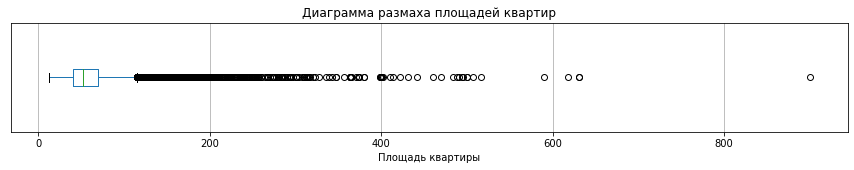

In [91]:
data.boxplot(column=['total_area'], figsize=(15,2), vert=False, grid=True)
plt.title('Диаграмма размаха площадей квартир')
plt.yticks([])
plt.xlabel('Площадь квартиры')
plt.show()

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>В данном случае, я бы порекомендовал расположить боксплот горизонтально 👇

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь и далее исправил.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Супер! 👍</div>

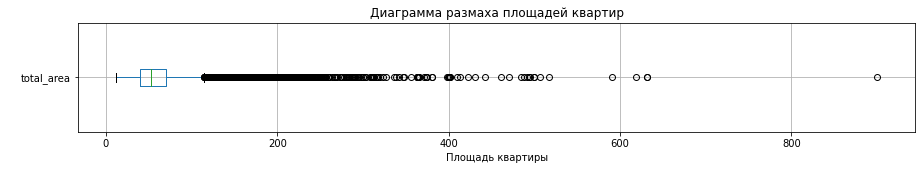

In [92]:
# Код ревьюера
data.boxplot(column=['total_area'], figsize=(15,2), grid=True, vert = False)
plt.ylabel(' ')
plt.xlabel('Площадь квартиры')
plt.title('Диаграмма размаха площадей квартир')
plt.show()

Диаграмма показывает выбросы с большими значениями площади. Посчитаем верхнюю границу "усов" и постороим гистограмму в их границах и за верхним пределом.

Верхняя граница: 114.75000000000001


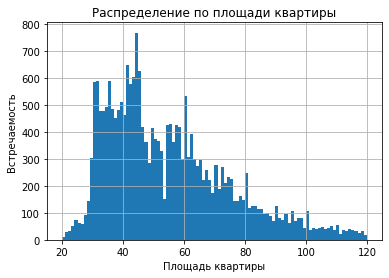

In [93]:
def upper_whisker(column):       #функция, вычисляющая верхнюю границу усов
    Q1 = column.quantile(q=0.25) #первый квартиль
    Q3 = column.quantile(q=0.75) #второй квартиль
    IQR = Q3 - Q1 #межквартильный размах
    return(Q3 + IQR*1.5)
print('Верхняя граница:', upper_whisker(data['total_area']))
plt.xlabel('Площадь квартиры')
plt.ylabel('Встречаемость')
plt.title('Распределение по площади квартиры')
data.query('20 < total_area < 120')['total_area'].hist(bins=100)  #гистограмма в границах усов
plt.show()

И за верхним пределом.

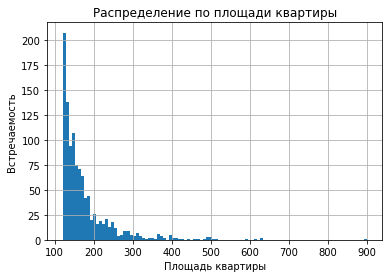

In [94]:
plt.xlabel('Площадь квартиры')
plt.ylabel('Встречаемость')
plt.title('Распределение по площади квартиры')
data.query('total_area >= 120')['total_area'].hist(bins=100) #гистограмма за пределами усов
plt.show()

Как видно из гистограммы, наиболее часто встречаемая площадь квартир - от 30 до 80 м2. Jсобенно часто встречаются варианты около 40 м2. Распределение выглядит очень реалистично. Но мне лично не до конца ясно, почему мы здесь должны избавляться от т.н. "выбросов", если квартиры площадью больше 120м2, и даже 900 м2, реально существуют на рынке. Посмотрим на изменение статистики в случае рассмотрения квартир из доверительного интервала.

In [95]:
data.query('total_area < 120')['total_area'].describe().round(2)

count   22,594.00
mean        54.76
std         19.95
min         12.00
25%         39.50
50%         50.40
75%         66.00
max        119.80
Name: total_area, dtype: float64

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Ты вроде бы не сохранил нужный срез. 🤔

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Все срезы сохранены перед разделом 4.2</div>

##### Изучение параметра "жилая площадь".

Построим ящик с усами для жилой площади для оценки количества выбросов

Верхняя граница: 76.75


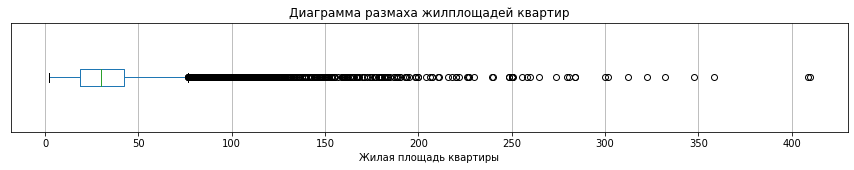

In [96]:
data.boxplot(column=['living_area'], figsize=(15,2), vert=False, grid=True)
plt.xlabel('Жилая площадь квартиры')
plt.yticks([])
plt.title('Диаграмма размаха жилплощадей квартир')
print('Верхняя граница:', upper_whisker(data['living_area']))
plt.show()

Здесь также присутствуют выбросы больших значений. Построим срезы в границах и за верхним пределом усов

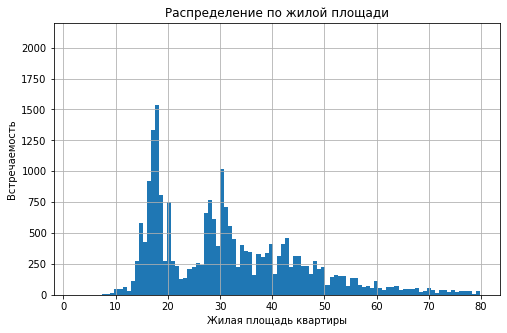

In [97]:
plt.ylim(0, 2200)
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Встречаемость')
plt.title('Распределение по жилой площади')
data.query('living_area < 80')['living_area'].hist(bins=100,  figsize=(8, 5))  #гистограмма в границах усов
plt.show()


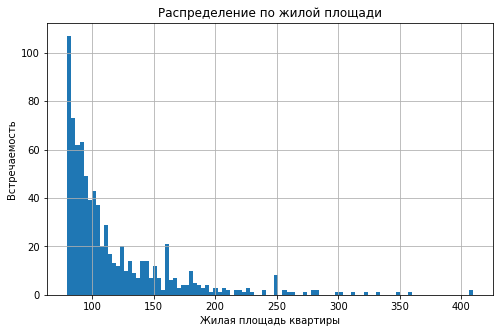

In [98]:
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Встречаемость')
plt.title('Распределение по жилой площади')
data.query('living_area >= 80')['living_area'].hist(bins=100, figsize=(8, 5)) #гистограмма за пределами усов
plt.show()

Казалось бы, вид графика не похож на распределение Пуансона, но в предобработке данных мной была высказана гипотеза о взаимной зависимости жилплощадей квартир с одинаковым количеством комнат. На большем масштабе распределение приобретает более нормальный вид.

count   22,894.00
mean        31.71
std         14.04
min          2.00
25%         18.74
50%         30.00
75%         40.90
max         79.74
Name: living_area, dtype: float64


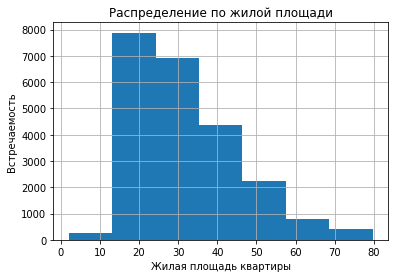

In [99]:
print(data.query('living_area < 80')['living_area'].describe().round(2))
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Встречаемость')
plt.title('Распределение по жилой площади')
data.query('living_area < 80')['living_area'].hist(bins=7) 
plt.show()

    Наблюдаем, что наиболее часто встречаемая жилая площадь квартир - от 15 до 50 м2, с отдельными пиками в районе 20, 30 и 45м2, что крайне вероятно отвечает самым частым на рынке 1-о, 2-х и 3-хкомнатным квартирам.  В выборке есть квартиры с жилой площадью меньше 5м2. В будущем не будем их учитывать.

##### Изучение параметра "площадь кухни".

Верхняя граница: 19.5


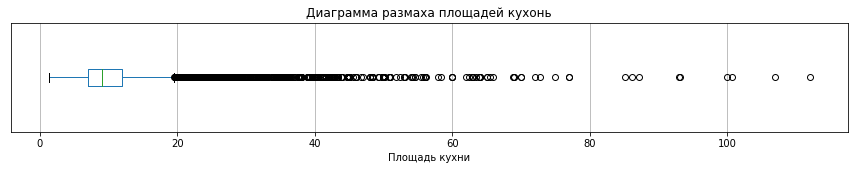

In [100]:
data.boxplot(column=['kitchen_area'], figsize=(15,2), vert=False, grid=True)
plt.xlabel('Площадь кухни')
plt.yticks([])
plt.title('Диаграмма размаха площадей кухонь')
print('Верхняя граница:', round(upper_whisker(data['kitchen_area']), 2))
plt.show()

Проделаем те же манипуляции, что и выше.

In [101]:
#def lower_whisker(column):       #функция, вычисляющая нижнюю границу усов
#    Q1 = column.quantile(q=0.25) #первый квартиль
#    Q3 = column.quantile(q=0.75) #второй квартиль
#    IQR = Q3 - Q1 #межквартильный размах
#    return(Q1 - IQR*1.5)

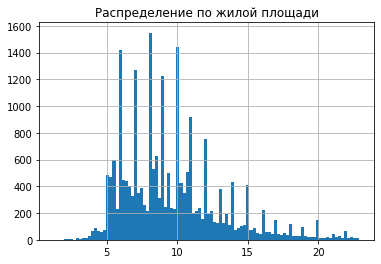

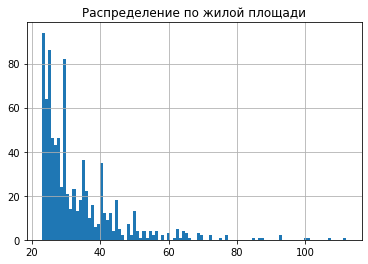

In [102]:
plt.title('Распределение по жилой площади')
data.query('kitchen_area < 23')['kitchen_area'].hist(bins=100)  #гистограмма в границах усов
plt.show()
plt.title('Распределение по жилой площади')
data.query('kitchen_area >= 23')['kitchen_area'].hist(bins=100) #гистограмма за пределами усов
plt.show()

In [103]:
data.query('kitchen_area < 23')['kitchen_area'].describe().round(2)

count   22,843.00
mean         9.65
std          3.55
min          1.30
25%          7.00
50%          9.00
75%         11.34
max         22.90
Name: kitchen_area, dtype: float64

##### Изучение параметра "цена квартиры"

In [104]:
data['last_price'].describe().apply(lambda x: "{:.0f}".format(x)) #применим формат к списку, 
                                            #иначе отображение идёт в экспоненциальной форме

count        23692
mean       6541629
std       10888421
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: object

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>📌 Чтобы избавиться от экспоненциальных форм можно прописать настройку `Pandas`, в блоке импорта библиотек.

```python
pd.set_option('display.float_format', '{:,.2f}'.format)
```
</div>

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>
​
Исправил.</div>

Очень смущает минимальная цена - 12000. Посмотрим диаграмму размаха

Верхняя граница: 11900000.0


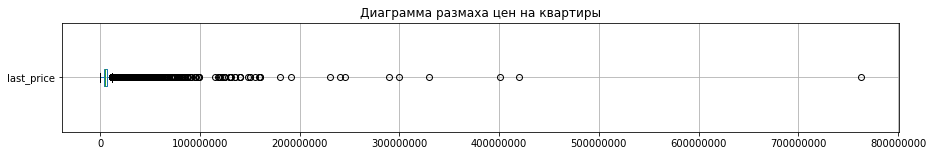

In [105]:
print('Верхняя граница:', round(upper_whisker(data['last_price']), 2))
fig, ax = plt.subplots(figsize=(15, 2))
data.boxplot(column=['last_price'], grid=True, vert=False)
ax.ticklabel_format(style='plain', axis='x') #Форматирование оси "y" без экспоненциальной записи
plt.title('Диаграмма размаха цен на квартиры')
plt.show()

Рассчитанная верхняя граница диаграммы меня лично смущает. Хвост граффика очень длинный, но в случае цены это довольно логично. Распределение денег среди людей так и выглядит. Странно брать для анализа квартиры исключительно дешевле 12 миллионов, ведь в Санкт-Петербурге есть огромное множество реальных квартир дороже. Посмотрим, что происходит на нижней границе цены(ниже первого квартиля):

Количество квартир дешевле полумиллиона рублей 14
Количество квартир дешевле миллиона рублей 225
99% квартир дешевле 36000000


236

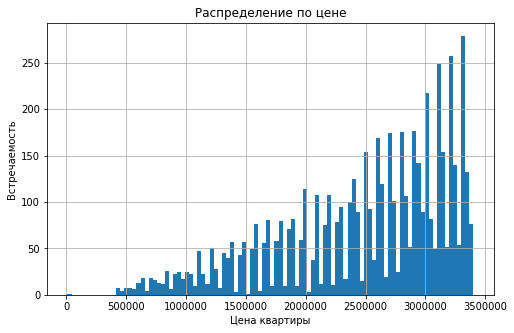

In [106]:
fig, ax = plt.subplots()
plt.title('Распределение по цене')
plt.xlabel('Цена квартиры')
plt.ylabel('Встречаемость')
data.query('last_price < 3400000')['last_price'].hist(ax=ax, bins=100, figsize=(8, 5))
ax.ticklabel_format(style='plain')

print('Количество квартир дешевле полумиллиона рублей', len(data.query('last_price < 500000')['last_price']))
print('Количество квартир дешевле миллиона рублей', len(data.query('last_price < 1000000')['last_price']))

print('99% квартир дешевле', data['last_price'].quantile(q=0.99).astype(int))
max_price = data['last_price'].quantile(q=0.99)
len(data.query('last_price > @max_price')['last_price'])

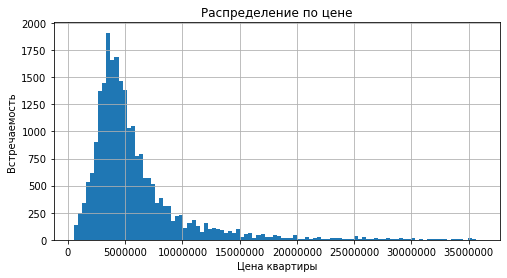

In [107]:
fig, ax = plt.subplots()
plt.title('Распределение по цене')
plt.xlabel('Цена квартиры')
plt.ylabel('Встречаемость')
data.query('500000 < last_price < 36000000')['last_price'].hist(ax=ax, bins=100, figsize=(8, 4))
ax.ticklabel_format(style='plain')  # Отключаем экспоненциальную запись осей
plt.show()

##### Изучение параметра "число комнат"

Построим диаграмму размаха по количеству комнат.

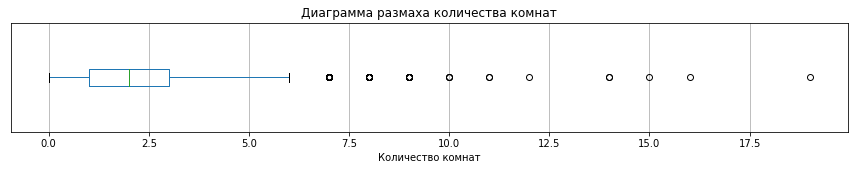

In [108]:
data.boxplot(column=['rooms'], figsize=(15, 2), grid=True, vert=False)
plt.title('Диаграмма размаха количества комнат')
plt.xlabel('Количество комнат')
plt.yticks([])
plt.show()

In [109]:
len(data[data['rooms']==0]) #Вспомним из предобработки, сколько осталось 0-комнатных квартир


59

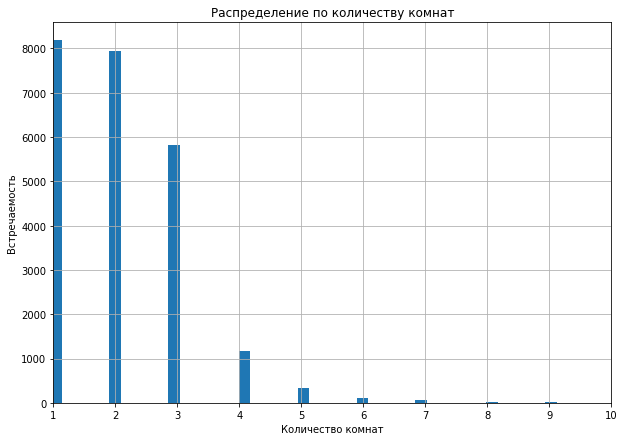

In [110]:
data.plot(y = 'rooms', xlim = (1, 10), kind = 'hist', bins = 100\
          , title='Распределение по количеству комнат', grid=True\
          , figsize = (10,7), legend=None)
plt.title('Распределение по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Встречаемость')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

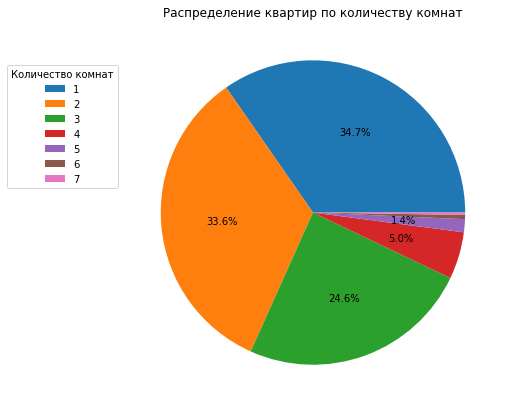

In [111]:
plt.figure(figsize=(7, 7)) # Построение круговой диаграммы
data[(0<data['rooms'])&(data['rooms']<8)]['rooms'].value_counts()\
.plot.pie(autopct=lambda pct: "" if pct < 1 else f"{pct:.1f}%", labels=None) #Отображаем только встречаемость чаще 1 процента

plt.legend(range(1,8), title='Количество комнат', loc='upper right', bbox_to_anchor=(0, 0.9)) #Легенда и её расположение
plt.ylabel('')
plt.title("Распределение квартир по количеству комнат")
plt.show

In [112]:
data.query('0 <rooms < 8')['rooms'].describe().round(2)

count   23,602.00
mean         2.07
std          1.02
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64

##### Изучение параметра "высота потолков"

Построим диаграмму размаха по высоте потолков.

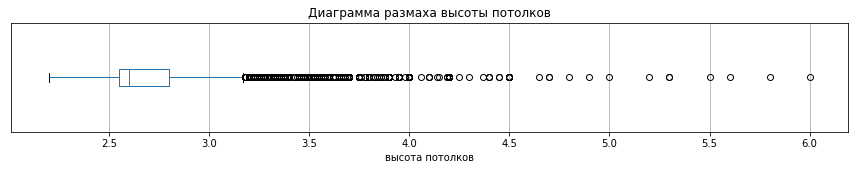

In [113]:
data.boxplot(column=['ceiling_height'], figsize=(15,2), grid=True, vert=False)
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('высота потолков')
plt.yticks([])
plt.show()

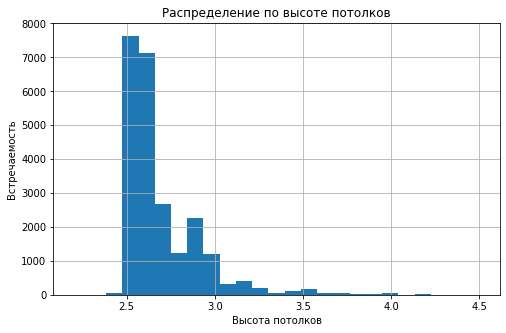

In [114]:
data.query('ceiling_height < 4.5').plot(y='ceiling_height', kind='hist', bins=25, range=(2.2, 4.5)\
                                        , title='Распределение по высоте потолков', grid=True\
                                        , figsize = (8, 5), legend=None)
plt.xlabel('Высота потолков')
plt.ylabel('Встречаемость')
plt.show()

Большинство квартир имеют потолки от 2.4 до 3м с пиком около 2.6м. Довольно типичная ситуация для города. Потолки выше 4 м будем считать выбросами. С вводом данных надо что-то делать. Скорее всего, как-то програмно ограничить или переспрашивать при попытке ввести аномальные значения.

In [115]:
data.query('ceiling_height <= 4')['ceiling_height'].describe().round(2)

count   23,646.00
mean         2.70
std          0.22
min          2.20
25%          2.55
50%          2.60
75%          2.80
max          4.00
Name: ceiling_height, dtype: float64

In [116]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,exposition_day,exposition_month,exposition_year,floor_type,distance_city_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,482,2,755,<NA>,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.55,11,18.60,1,NaN,...,<NA>,0,<NA>,81,82920,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,90,2,574,558,92785,3,8,2015,другой,13
3,0,64900000,159.00,2015-07-24,3,2.90,14,90.30,9,NaN,...,84,3,234,424,408176,4,7,2015,другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,112,1,48,121,100000,1,6,2018,другой,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23692 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23692 non-null  int64         
 1   last_price            23692 non-null  int64         
 2   total_area            23692 non-null  float64       
 3   first_day_exposition  23692 non-null  datetime64[ns]
 4   rooms                 23692 non-null  int64         
 5   ceiling_height        23692 non-null  float64       
 6   floors_total          23692 non-null  int64         
 7   living_area           23692 non-null  float64       
 8   floor                 23692 non-null  int64         
 9   is_apartment          2773 non-null   object        
 10  studio                23692 non-null  bool          
 11  open_plan             23692 non-null  bool          
 12  kitchen_area          23692 non-null  float64       
 13  balcony         

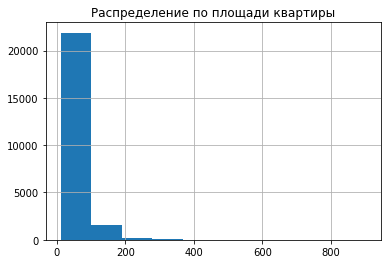

In [117]:
# Код ревьюера
print(data.info())
plt.title('Распределение по площади квартиры')
data['total_area'].hist();

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Ты правильно поработал с количественными признаками, но обнаруженные аномальные значения не были удалены из датафрейма.

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>
​
Исправил ниже</div>

In [118]:
data = data.query('20 < total_area < 120 and 10 < living_area < 80 and 5 < kitchen_area < 20\
and 500000 < last_price < 30000000 and 0 < rooms < 8 and 2.2 < ceiling_height < 4.1')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20901 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20901 non-null  int64         
 1   last_price            20901 non-null  int64         
 2   total_area            20901 non-null  float64       
 3   first_day_exposition  20901 non-null  datetime64[ns]
 4   rooms                 20901 non-null  int64         
 5   ceiling_height        20901 non-null  float64       
 6   floors_total          20901 non-null  int64         
 7   living_area           20901 non-null  float64       
 8   floor                 20901 non-null  int64         
 9   is_apartment          2442 non-null   object        
 10  studio                20901 non-null  bool          
 11  open_plan             20901 non-null  bool          
 12  kitchen_area          20901 non-null  float64       
 13  balcony         

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Хорошо. На будущее порекомендую удалять аномалии по параметрам поэтапно, проверяя количество удаленных записей. Если сразу прописать уловие по нескольким параметрам, может быть удалено больше записей, чем допустимо при предобработке.

#### Задание 1: «Исследование того, как быстро продавались квартиры»:


Проанализируем распределение данных о том, как быстро продавались квартиры, чтобы определить, какие продажи считать быстрыми, а какие - аномально долгими.

In [119]:
data['days_exposition'].describe().round(2)

count   18,268.00
mean       174.97
std        213.15
min          1.00
25%         44.00
50%         92.00
75%        222.00
max      1,580.00
Name: days_exposition, dtype: float64

Среднее и медиана различаются в два раза. Посмотрим диаграму размаха.

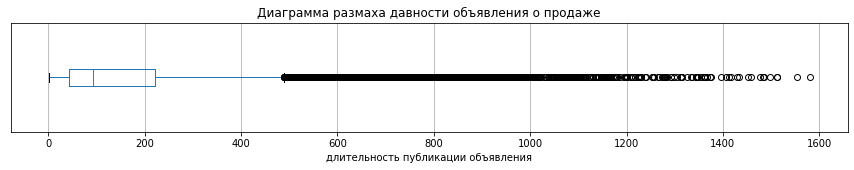

Верхняя граница: 489


In [120]:
data.boxplot(column='days_exposition', grid=True, figsize=(15, 2), vert=False)
plt.title('Диаграмма размаха давности объявления о продаже')
plt.xlabel('длительность публикации объявления')
plt.yticks([])
plt.show()
print('Верхняя граница:', int(upper_whisker(data['days_exposition'])))

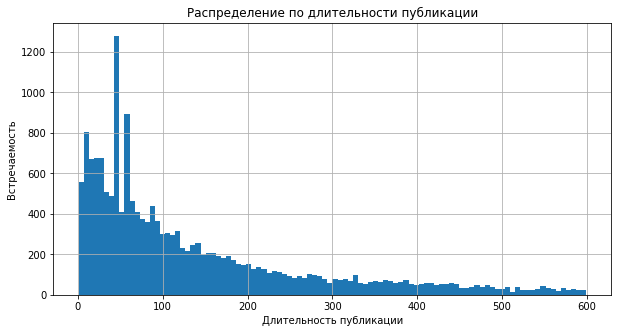

In [121]:
plt.xlabel('Длительность публикации')
plt.ylabel('Встречаемость')
plt.title('Распределение по длительности публикации')
data.query('days_exposition < 600')['days_exposition'].hist(bins=100, figsize=(10,5))
plt.show()

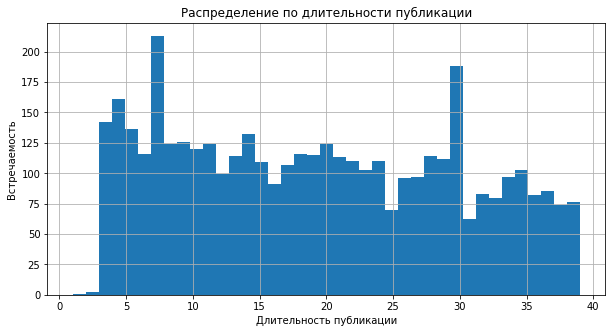

In [122]:
plt.xlabel('Длительность публикации')
plt.ylabel('Встречаемость')
plt.title('Распределение по длительности публикации')
data.query('days_exposition < 40')['days_exposition'].hist(bins=39, figsize=(10,5))
plt.show()

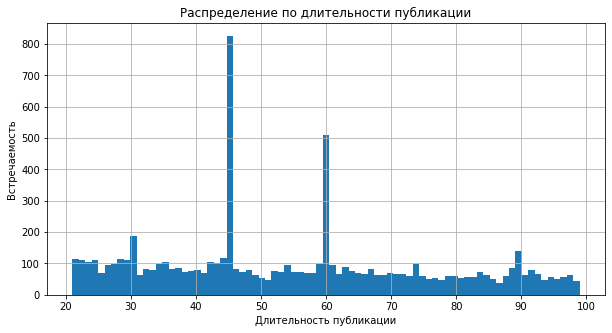

In [123]:
plt.xlabel('Длительность публикации')
plt.ylabel('Встречаемость')
plt.title('Распределение по длительности публикации')
data.query('20 < days_exposition < 100')['days_exposition'].hist(bins=79, figsize=(10,5))
plt.show()

Выбивающиеся значения подозрительно кратны 15. Скорее всего, эти объекты были сняты с доски не вследствие продажи, а автоматически. Остальные значения отлично укладываются в распределение Пуассона. Вычислим, сколько таких случаев.

In [124]:
len(data.query('days_exposition == 30 or days_exposition == 45 or days_exposition == 60 or days_exposition == 90')['days_exposition'])

1665

Довольно много. Поиск причин снятия объявлений показал, что они действительно убираются автоматически и не являются признаком продажи квартиры. Для дальнейшего анализа удалим избыточное для каждого случая(45, 60, 90) количество "продаж", указав вероятность удаления в зависимости от избыточности значений. Сам столбец менять не будем, собрав данные в новом.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Не очень понял смысл заполнения рандомными значениями дней, когда объявления автоматически снимались с публикации. Можно просто отфильтровать их, чтобы не искажать распределения данных.

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>
​
Я посчитал, что если удалить все публикации, провисевшие на доске 30, 45, 60 и 90 дней, то уничтожатся в т.ч. и те публикации, которые были проданы спустя это время и сняты самими пользователями, в результате чего в эти дни на графике будут аномальные пустоты, что является бОльшим искажением, нежели удалить лишь пропорциональную их часть. Я не заполнял их рандомными значениями, а лишь поудалял в рандомной степени. Может, я не так понял ситуацию  </div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

По идее, в эти сроки объявления снимались с публикации автоматически и удалять ничего не нужно, просто стоит обратить на это внимание заказчика/читателя исследования.

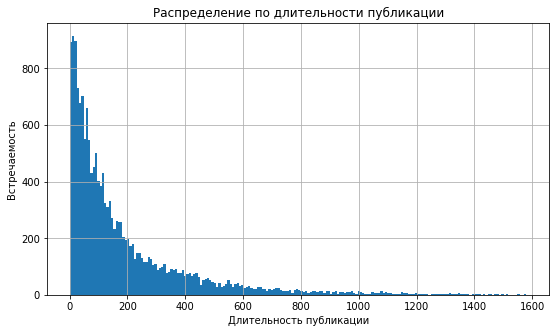

In [125]:
import random
def transform_exposition_days(row): #Пишем функцию по замену значений на NaN с определённой вероятностью в зависимости от количества дней
    if pd.isnull(row['days_exposition']): #Возвращаем значение, если это уже NaN, во избежание ошибки
        return row['days_exposition']
    elif row['days_exposition'] == 30:
        if random.choices([True, False], weights=[0.5, 0.5])[0]: #Вес в скобках определяет вероятность замены на NaN
            return pd.NA
    elif row['days_exposition'] == 45:
        if random.choices([True, False], weights=[0.9, 0.1])[0]:
            return pd.NA
    elif row['days_exposition'] == 60:
        if random.choices([True, False], weights=[0.8, 0.2])[0]:
            return pd.NA
    elif row['days_exposition'] == 90:
        if random.choices([True, False], weights=[0.6, 0.4])[0]:
            return pd.NA
    return row['days_exposition']

    
data['transformed_days_exposition'] = data.apply(transform_exposition_days, axis=1) #Создаём столбец с обработанными данными, 
data['transformed_days_exposition'].hist(bins=200, figsize=(9, 5)) #применив функцию к нашей dataframe
plt.title('Распределение по длительности публикации')
plt.xlabel('Длительность публикации')
plt.ylabel('Встречаемость')
plt.show()                         #проверяем характер распределения в большом масштабе

Ещё раз проверим "проблемную" зону

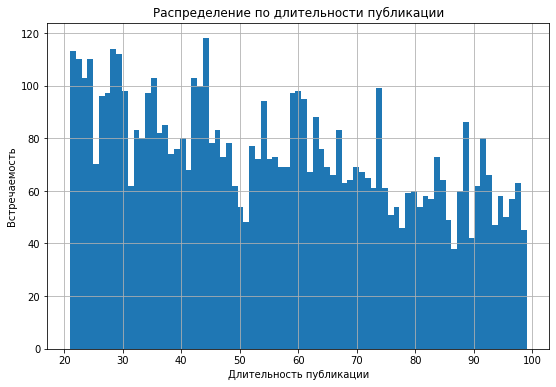

In [126]:
plt.xlabel('Длительность публикации')
plt.ylabel('Встречаемость')
plt.title('Распределение по длительности публикации')
data.query('20 < transformed_days_exposition < 100')['transformed_days_exposition'].hist(bins=79, figsize=(9, 6)) # и конкретно в проблемной зоне
plt.show()

In [127]:
data['transformed_days_exposition'] = data['transformed_days_exposition'].astype('Int64')
print('Верхняя граница:', int(upper_whisker(data['transformed_days_exposition'])))
data['transformed_days_exposition'].describe()

Верхняя граница: 537


count   16,919.00
mean       184.79
std        218.49
min          1.00
25%         42.00
50%        105.00
75%        240.00
max      1,580.00
Name: transformed_days_exposition, dtype: float64

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Какие продажи можно считать быстрыми, а какие — необычно долгими?

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Дописал.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Верно, при определении сроков быстрых и медленных продаж стоит ориентироваться на квартили распределения.

#### Задание 2: «Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта». 

Построим таблицу корреляций с учетом отброшенных значений.

In [128]:
data[['last_price', 'total_area', 'living_area','kitchen_area',  'rooms', 'ceiling_height']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height
last_price,1.00,0.70,0.59,0.52,0.41,0.55
total_area,0.70,1.00,0.93,0.51,0.80,0.44
living_area,0.59,0.93,1.00,0.26,0.88,0.36
kitchen_area,0.52,0.51,0.26,1.00,0.11,0.38
rooms,0.41,0.80,0.88,0.11,1.00,0.20
ceiling_height,0.55,0.44,0.36,0.38,0.20,1.00


##### Общая площадь;

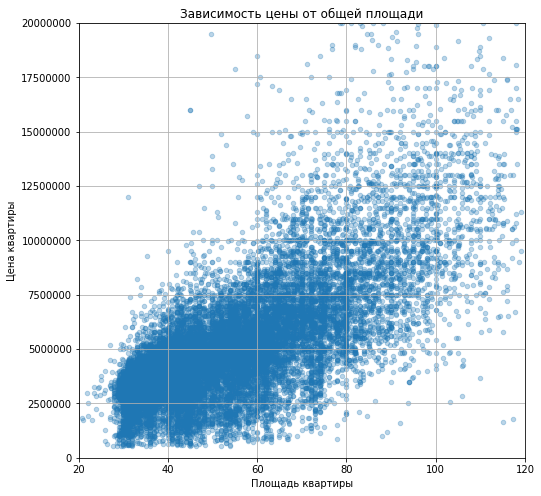

In [129]:
fig, ax = plt.subplots()
data.plot.scatter(x = 'total_area', y = 'last_price', grid=True, ax=ax, xlim=(20, 120), \
                  ylim=(0, 20000000), alpha=0.3, figsize=(8, 8))
ax.set_xlabel('Площадь квартиры')
ax.set_ylabel('Цена квартиры')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от общей площади')
plt.show()

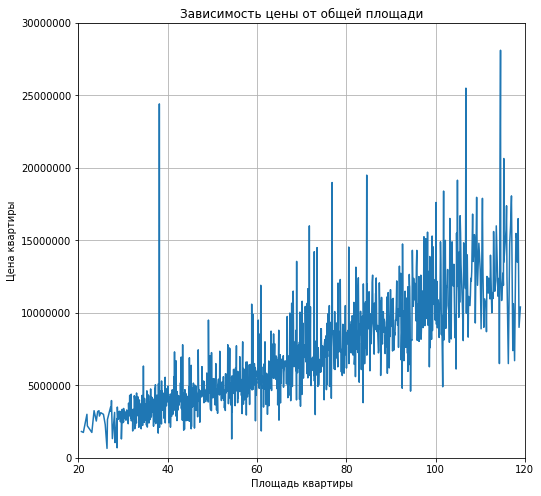

In [130]:
fig, ax = plt.subplots()
data.pivot_table(index='total_area', values='last_price')\
    .plot(grid=True, ax=ax, xlim=(20, 120), ylim=(0, 30000000), figsize=(8, 8), legend=None)
ax.set_xlabel('Площадь квартиры')
ax.set_ylabel('Цена квартиры')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от общей площади')
plt.show()

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Для визуализации корреляции лучше использовать диаграммы рассеяния. Кроме того, в методе pivot_table по умолчанию используется агрегирующая функция mean, а это огрубляет расчеты корреляции. В данном примере - это не критично, но лучше использовать весь массив данных для определения корреляции.

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Добавил диаграммы рассеяния для всех параметров, кроме категориальных (количество комнат, тип этажа и даты), т.к. графики вышли так себе.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Для категориальных параметров как раз подходят столбчатые диаграммы или линейные графики как у тебя с медианными ценами.

##### Жилая площадь;

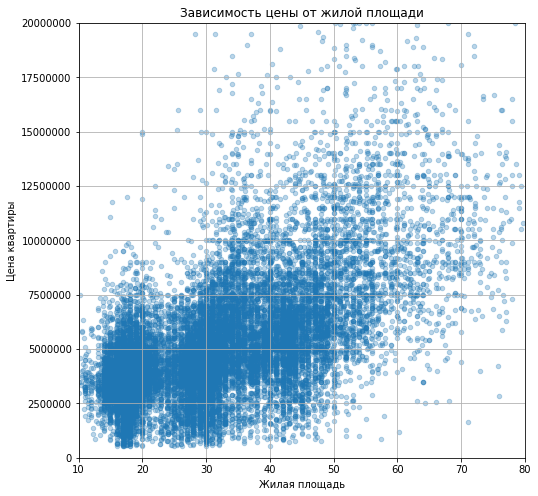

In [131]:
fig, ax = plt.subplots()
data.plot.scatter(x = 'living_area', y = 'last_price', grid=True, ax=ax, xlim=(10, 80), \
                  ylim=(0, 20000000), alpha=0.3, figsize=(8, 8))
ax.set_xlabel('Жилая площадь')
ax.set_ylabel('Цена квартиры')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от жилой площади')
plt.show()

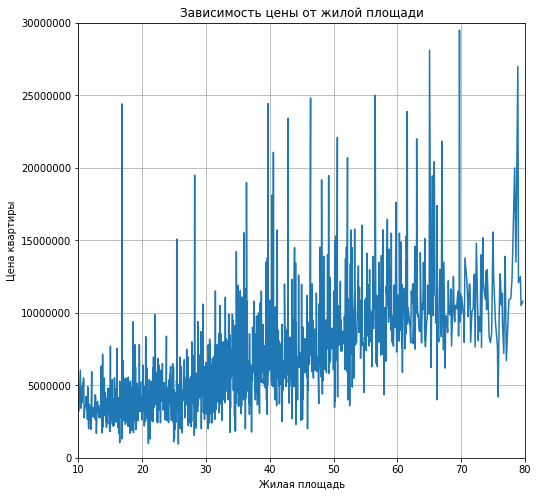

In [132]:
fig, ax = plt.subplots()
data.pivot_table(index='living_area', values='last_price')\
    .plot(grid=True, ax=ax, ylim=(0, 30000000), xlim=(10, 80), figsize=(8, 8), legend=None)
ax.set_xlabel('Жилая площадь')
ax.set_ylabel('Цена квартиры')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от жилой площади')
plt.show()

##### Площадь кухни;

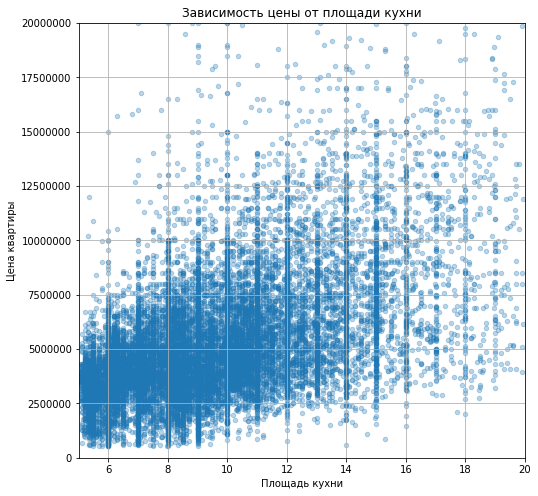

In [133]:
fig, ax = plt.subplots()
data.plot.scatter(x = 'kitchen_area', y = 'last_price', grid=True, ax=ax, xlim=(5, 20), \
                  ylim=(0, 20000000), alpha=0.3, figsize=(8, 8), legend=None)
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Цена квартиры')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от площади кухни')
plt.show()

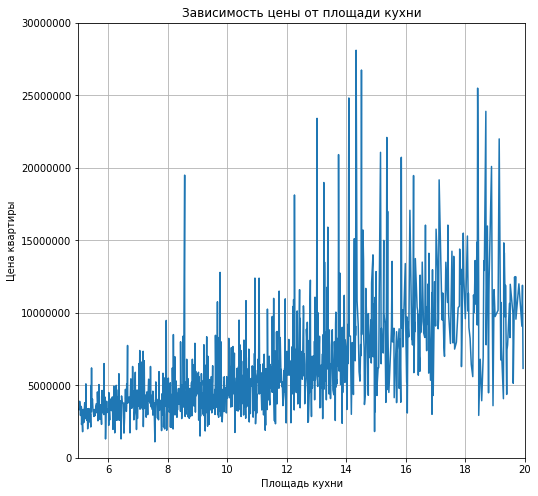

In [134]:
fig, ax = plt.subplots()
data.pivot_table(index='kitchen_area', values='last_price')\
    .plot(grid=True, ax=ax, xlim=(5, 20), ylim=(0, 30000000), figsize=(8, 8), legend=None)
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Цена квартиры')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от площади кухни')
plt.show()

##### Количество комнат;

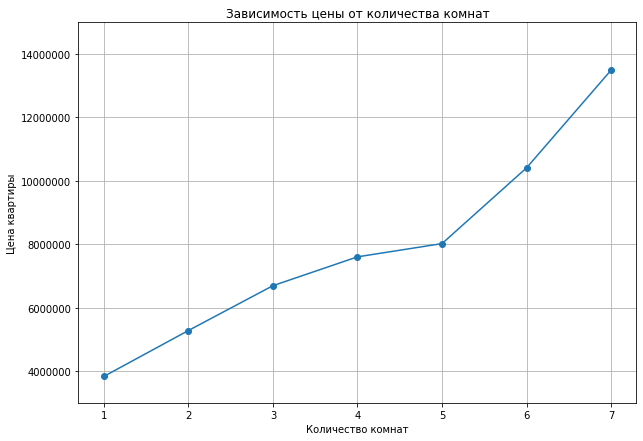

In [135]:
fig, ax = plt.subplots()
data.pivot_table(index='rooms', values='last_price')\
    .plot(style='o-', grid=True, ax=ax, ylim=(3000000, 15000000), figsize=(10, 7), legend=None)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Цена квартиры')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от количества комнат')
plt.show()

##### Тип этажа, на котором расположена квартира (первый, последний, другой);

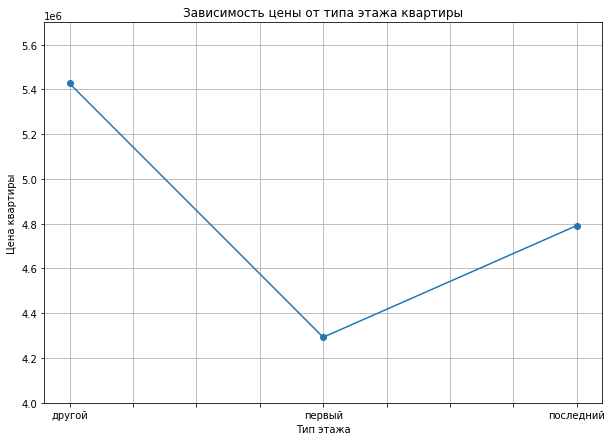

In [136]:
data.pivot_table(index='floor_type', values='last_price')\
    .plot(style='o-', grid=True, ylim=(4000000, 5700000), figsize=(10, 7), legend=None)
plt.title('Зависимость цены от типа этажа квартиры')
plt.ylabel('Цена квартиры')
plt.xlabel('Тип этажа')
plt.show()

##### Дата размещения объявления о продаже (день недели, месяц, год).

Расмотрим отдельно каждый из параметров.

###### День недели  публикации объявления

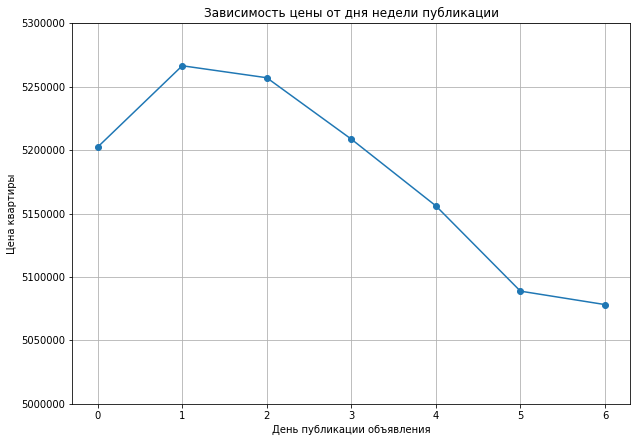

In [137]:
fig, ax = plt.subplots()
data.pivot_table(index='exposition_day', values='last_price')\
    .plot(style='o-', grid=True, ax=ax, ylim=(5000000, 5300000), figsize=(10,7), legend=None)
ax.set_ylabel('Цена квартиры')
ax.set_xlabel('День публикации объявления')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от дня недели публикации')
plt.show()

###### Месяц публикации объявления

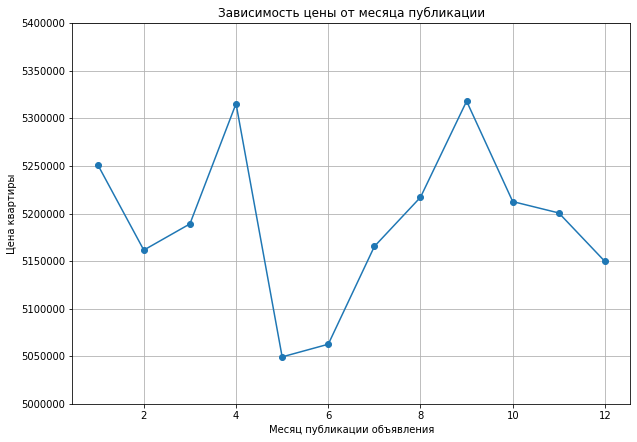

In [138]:
fig, ax = plt.subplots()
data.pivot_table(index='exposition_month', values='last_price')\
    .plot(style='o-', grid=True, ax=ax, ylim=(5000000, 5400000), figsize=(10, 7), legend=None)
ax.set_ylabel('Цена квартиры')
ax.set_xlabel('Месяц публикации объявления')
ax.ticklabel_format(style='plain')
plt.title('Зависимость цены от месяца публикации')
plt.show()


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Вероятно можно наблюдать сезонность на этом графике. В летние месяцы средняя цена ниже.

###### Год публикации объявления

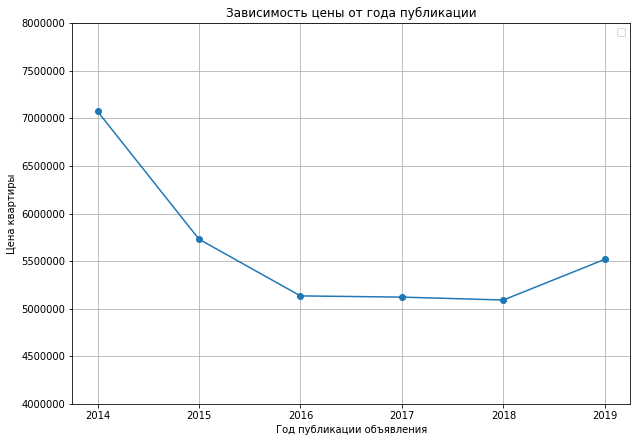

In [139]:
fig, ax = plt.subplots()
data.pivot_table(index='exposition_year', values='last_price')\
    .plot(style='o-', grid=True, ax=ax, ylim=(4000000, 8000000), figsize=(10, 7))
ax.ticklabel_format(style='plain')
ax.set_ylabel('Цена квартиры')
ax.set_xlabel('Год публикации объявления')
plt.title('Зависимость цены от года публикации')
plt.gca().legend('')
plt.show()


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Зависимость цены от количеств комнат, типа этажа, дня недели, месяца и года размещения показана верно.

#### Задание 3: «Расчёт стоимости одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:

In [140]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,exposition_day,exposition_month,exposition_year,floor_type,distance_city_center,transformed_days_exposition
1,7,3350000,40.40,2018-12-04,1,2.55,11,18.60,1,NaN,...,0,<NA>,81,82920,1,12,2018,первый,18,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,2,574,558,92785,3,8,2015,другой,13,558
5,10,2890000,30.40,2018-09-10,1,2.55,12,14.40,5,NaN,...,<NA>,<NA>,55,95065,0,9,2018,другой,<NA>,55
6,6,3700000,37.30,2017-11-02,1,2.60,26,10.60,6,NaN,...,0,<NA>,155,99195,3,11,2017,другой,19,155
7,5,7915000,71.60,2019-04-18,2,2.90,24,40.66,22,NaN,...,0,<NA>,<NA>,110544,3,4,2019,другой,11,<NA>


In [141]:
citys = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False)
type(citys)
our_list = list(citys.index)[0:10]
our_list
for hood in our_list:
    print(hood)
    print(round(data.query('locality_name == @hood')['meter_price'].mean(), -3).astype(int))

Санкт-Петербург
109000
посёлок Мурино
84000
посёлок Шушары
78000
Всеволожск
69000
Колпино
75000
посёлок Парголово
90000
Пушкин
102000
Гатчина
69000
посёлок Кудрово
92000
Выборг
58000


<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Давай соберем все данные в одну сводную таблицу:
    
- название населенного пункта
- количество объявлений
- средняя цена кв метра

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Исправил ниже.</div>

In [142]:
locality_pivot = pd.pivot_table(data, index='locality_name', aggfunc={
    'locality_name': 'count',
    'meter_price': 'mean'
})

# Переименовываем первый столбец
locality_pivot.rename(columns={'locality_name': 'Количество объявлений', 'meter_price': 'Цена за метр'}, inplace=True)

# Сортируем таблицу по столбцу 'locality_name' в порядке убывания
locality_pivot = locality_pivot.sort_values('Количество объявлений', ascending=False)

# Выводим первые 10 населенных пунктов с самым большим количеством объявлений
print(locality_pivot.head(10))


                   Количество объявлений  Цена за метр
locality_name                                         
Санкт-Петербург                    13654    108,557.31
посёлок Мурино                       480     84,219.38
посёлок Шушары                       418     78,118.74
Всеволожск                           377     68,535.86
Колпино                              322     75,356.17
посёлок Парголово                    317     90,281.93
Пушкин                               305    102,166.74
Гатчина                              274     69,265.32
посёлок Кудрово                      253     92,398.15
Выборг                               205     57,821.24


<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

 👍</div>

#### Задание 4: «Выбор квартир в Санкт-Петербурге с помощью столбца locality_name и вычисление их средней стоимости на разном удалении от центра»:


Создадим отдельную таблицу для объявлений по продаже конкретно в Санкт-Петербурге.

In [143]:
data_city = data[data['locality_name'] == 'Санкт-Петербург'].reset_index()
data_city['city_centers_nearest'].describe()

count   13,615.00
mean    12,094.10
std      4,586.52
min        208.00
25%      9,479.00
50%     12,612.00
75%     15,096.00
max     29,493.00
Name: city_centers_nearest, dtype: float64

In [144]:
# Для удобства переведём в км
data_city['city_centers_nearest'] /= 1000

Найдём наибольшее удаление от центра

In [145]:
farthest = int(data_city['city_centers_nearest'].max()) + 1
farthest

30

In [146]:
data_city['mean_price'] = 0
for km in range(farthest):
    data_city.loc[km, 'mean_price'] = (data_city.query('@km < city_centers_nearest < @km+1')['last_price'].mean())

In [147]:
#(data_city['mean_price']/1000000).apply(lambda x: "{:.3f}".format(x)).head(30)

data_city['mean_price'] = round(data_city['mean_price']/1000000, 3)

In [148]:
# Создадим столбец с покилометровой удаленностью от центра для удобства построения графика ниже
data_city.loc[:29, 'range'] = list(range(0, 30))

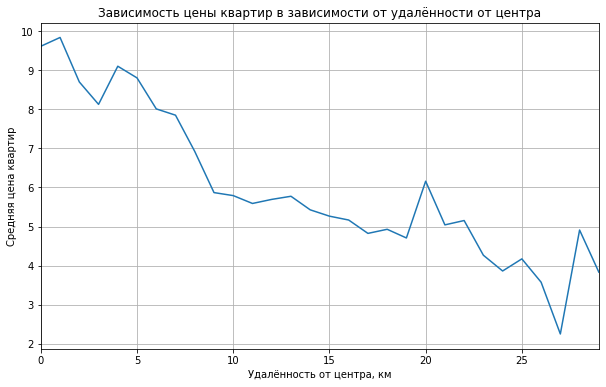

In [149]:
fig, ax = plt.subplots()
data_city.plot(x = 'range', y = 'mean_price',ax=ax, grid=True, xlim = (0, 29)\
               , figsize = (10, 6), legend=None)
ax.set(ylabel='Средняя цена квартир', xlabel='Удалённость от центра, км'\
       , title='Зависимость цены квартир в зависимости от удалённости от центра')
ax.ticklabel_format(style='plain')

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Зависимость цены от расстояния до центра Петербурга показана правильно.</div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Можно отдельно рассмотреть объявления о продажах квартир на 27-м км от центра, выяснить причину такого выброса средней цены.</div>

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Рассмотрел ниже.</div>

In [150]:
data_city.query('25 < distance_city_center < 29').sort_values('distance_city_center')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,meter_price,exposition_day,exposition_month,exposition_year,floor_type,distance_city_center,transformed_days_exposition,mean_price,range
4446,7732,20,3975000,74.00,2018-08-20,3,3.20,3,43.80,2,...,112,53716,0,8,2018,другой,26,112,0.00,NaN
8160,14146,18,4150000,36.00,2018-09-05,1,2.50,10,20.00,7,...,45,115277,2,9,2018,другой,26,<NA>,0.00,NaN
10643,18378,9,2600000,46.00,2017-11-10,1,2.55,2,20.00,1,...,29,56521,4,11,2017,первый,26,29,0.00,NaN
3448,5961,6,2250000,32.00,2018-02-27,1,2.55,2,16.50,2,...,178,70312,1,2,2018,последний,27,178,0.00,NaN
430,814,0,7600000,111.00,2017-07-26,3,3.00,16,63.00,12,...,66,68468,2,7,2017,другой,28,66,0.00,NaN
611,1111,0,4072000,38.00,2015-10-14,1,2.60,5,16.00,4,...,285,107157,2,10,2015,другой,28,285,0.00,NaN
5509,9572,0,3413000,43.00,2015-11-10,1,2.60,5,18.00,1,...,258,79372,1,11,2015,первый,28,258,0.00,NaN
6243,10798,10,4850000,62.00,2017-05-16,3,2.65,5,35.70,1,...,63,78225,1,5,2017,первый,28,63,0.00,NaN
6720,11652,16,4700000,51.00,2016-06-07,2,2.60,5,30.00,1,...,539,92156,1,6,2016,первый,28,539,0.00,NaN
10326,17798,0,4990000,71.00,2015-10-14,3,2.65,5,42.00,1,...,285,70281,2,10,2015,первый,28,285,0.00,NaN


Изучив срез самых удалённых от центра предложений, можно сделать вывод, что локальные пики могут быть следствием слишком маленькой выборки, а это влечет за собой большую чувствительность среднего к любым флуктуациям внутри неё.

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Да. Я тут обнаружил только одну квартиру 👇

In [152]:
# Код ревьюера
data.query('locality_name == "Санкт-Петербург" and distance_city_center == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,exposition_day,exposition_month,exposition_year,floor_type,distance_city_center,transformed_days_exposition
5961,6,2250000,32.00,2018-02-27,1,2.55,2,16.50,2,NaN,...,0,<NA>,178,70312,1,2,2018,последний,27,178


### Общий вывод

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Общий вывод - важный элемент работы. В нем стоит кратко сформулировать основные результаты исследования, добавить рекомендации, возможно заказчик исследования прочтет только итоговый вывод. Материалы курса рекомендуют такую структуру итогового вывода:

[![image.png](https://i.postimg.cc/yxCDwdDC/image.png)](https://postimg.cc/mzVZ9T3m)

    В данном проекте были исследованы данные сервиса "Яндекс Недвижимость" — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и его пригородах.
    
    Исследование мы начали с загрузки данных и первичного ознакомления с ними. Данные оказались довольно грязными и неполными. Произвели небольшие преобразования и перешли к их предобработке. В процессе предобработки данных было подтверждено отсутствие явных дубликатов, а восстановление пропусков, количество которых в некоторых значимых колонках доходило до 40%, оказалось нетривиальной задачей. Для восстановления отсутствующих значений использовалась корреляционная созависимось значений в заполненных столбцах и столбцах с пропусками. Изучение характера распределений позволило обнаружить аномалии и обработать или удалить их из данных, что значительно удостоверило метрики. Для наглядности и удобства работы изменили типы данных большинства колонок. Были добавлены категориальные колонки с днём,месяцем, годом публикации (выведены из колонки с датой), этажностью и количественные колонки с расстоянием до центра и ценой за 1 кв.м. Думаю, было бы неплохо в будующем добавлять их автоматически. Также автозаполнение помогло бы в избавлении от неявных дубликатов в названиях населенных пунктов, что иначе превращается в неудобную для решения задачу. Колонки, где данные были получены автоматически на основе картографии, и пропуски в них были оставлены без изменения.

        Выводы по исследовательскому анализу данных:

1. При анализе времени продажи квартир было обнаружено, что множество объявлений были автоматически сняты с площадки, что делает дату снятия непригодной для определения даты продажи. Следовательно, средние сроки продажи квартир необходимо интерпретировать с учётом этого фактора.

2. Используя диаграмму размаха, мы выяснили, что неаномальные значения времени продажи квартир варьируются от 1 до 600 дней. Величина стандартного отклонения показывает большой разброс данных по дням продажи. По квартилям можно сделать вывод, что относительно быстрой продажей можно считать период от 40 до 100 дней. Менее 40 дней - это очень быстро. Продажи более 240 дней можно считать необычно долгими.

3. Распределение общей площади квартир показывает, что большинство предложений приходится на квартиры площадью от 40 до 69 кв.м, с большим разбросом данных.

4. Распределение цен имеет форму нормального распределения с максимумом в районе 3-4 млн. рублей. Также наблюдается увеличение количества недвижимости премиум сегмента.

5. Этажность зданий также имеет свои особенности, с большим количеством предложений на первых этажах и второй "ступенью значений" на 6-9 этажах.

6. Анализ зависимости средней цены от общей площади показывает наличие зависимости, особенно для квартир площадью от 10 до 60 кв.м.

   В ходе исследования были выявлены определенные особенности и зависимости, присутствующие на рынке недвижимости данного региона. Факторы, оказывающие наибольшее влияние на общую стоимость объекта недвижимости, включают в себя: площадь квартиры, чуть менее - жилая площадь, высота потолков. Площадь кухни и количество комнат на удивление незначительно определяет цену объекта.   
       Влияние дня недели выставления объявления:
Обнаружено небольшое различие в зависимости от дня выставления объявлений - около 200 тыс между крайними значениями. В выходные - минимумы, максимум - в середине недели. Скорее всего, какие-то психологические факторы, влияющие на принятие решения о цене.
       Влияние месяца выставления объявления:
График медианных значений наглядно демонстрирует какие-то сезонные флуктуации с минимумом в летние месяцы и максимумами в межсезонье.
       Влияние года выставления объявления:
С 2014 года средняя цена начала резко падать в среднем с 7 млн до 5 млн в 2016 г., после чего 2 года цена не менялась. С 2018 по 2019 виден небольшой возрастающий тренд до 5.5 млн в среднем. Наверняка, сказывалась глобальная обстановка.
       Анализ средней цены за кв.м и количества объявлений по населённым пунктам показал закономерное лидерство областнго центра - и по количеству объявлений, и по средней цене за метр: 108 тыс. Но в некоторых пригородах цены не сильно ниже. Престижные пригороды - Пушкин, Кудрово, Парголово, Мурино(от 80 до 100 тыс.). Средние - пос. Шушары и Колпино(ок.75 тыс.). Замыкают список Всеволожск, Гатчина и Выборг(ок.60 тыс.). 
   Исследование позволило выявить ключевые факторы, влияющие на цену и время продажи квартир, а также представить общую картину рынка недвижимости в регионе.
       Также для Санкт-Петербурга  нами была визуализирована зависимость средней цены 1 кв.м от близости к центру города. 
   При анализе получена очевидная картина снижения стоимости 1 кв.м при удалении от центра. Квартиры в центре - самые дорогие(около 10 млн в среднем в самом центре). При удалении от центра цены резко падают до 8 млн на растоянии 3км от него, но  на 20-м км есть небольшой пик. На 25 км квартиры стоят уже "всего" 4 млн в среднем. Также виден пик роста цен для расстояния 27 км, обусловленный недостаточностью размера выборки.
       Дополнительно к уже упомянутым рекомендациям, я бы предложил следующее участникам команды:
   Например, можно порекомендовать в будущем провести отбор новых признаков или дать советы по предотвращению появления дубликатов и пропущенных значений.
   После завершения работы по обработке и анализу недостающих данных, важно обратить внимание коллег на заполненность ячеек при подготовке и сборе данных, а также на корректность выгрузки данных из программы. Ошибки, связанные с человеческим фактором (опечатки и прочее), встречаются довольно редко, что значительно упрощает процесс предварительной обработки материала для анализа. Возможно, стоит снабдить заполнение информационными подсказками, что бы помогло в случае с заполнением специфических характеристик жилья, что наиболее характерно в случае принадлежности к апартаментам. Автоудаление объявления с площадки тоже желательно фиксировать автоматически.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера:</b></h5>

У тебя получился очень сильный проект, ты уверенно владеешь материалами спринта. 👍 
    
Но давай сделаем его еще лучше и нужно кое-что поправить, чтобы я его принял.

Критические замечания я добавил в меню **Contents** слева.

Также, постарайся отработать желтые комментарии.

Буду ждать твой доработанный проект. ⌛️

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера 2</b></h5>

Спасибо, что учел мои замечания и доработал проект, получилась отличная работа!

Успехов в дальнейшем обучении! 🏆

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [ ]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [ ]  Найдены пропущенные значения.
- [ ]  Пропущенные значения заполнены там, где это возможно.
- [ ]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [ ]  Объяснено, в каких столбцах изменён тип данных и почему.
- [ ]  Устранены неявные дубликаты в названиях населённых пунктов.
- [ ]  Обработаны редкие и выбивающиеся значения (аномалии).
- [ ]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.